## <p style="background-color:#47AC34; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;"> **Adult Income Prediction**</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47AC34" data-toggle="popover">Content</a>



**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()


%matplotlib inline
plt.rcParams['figure.figsize'] = (4.5,3)


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score

from sklearn.pipeline import Pipeline


from sklearn.preprocessing import  LabelEncoder


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [6]:
!pip  scikit-plot

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Iemand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\__init__.py)

In [8]:
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve


In [9]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Iemand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\__init__.py)

In [10]:
!pip install --upgrade scikit-learn

'pip' is not recognized as an internal or external command,
operable program or batch file.


### <p style="background-color:#47AC34; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Reading the data from file</p>

In [282]:
df = pd.read_csv('adult.csv')

## <p style="background-color:#47AC34; font-family:Georgia; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Recognizing and Understanding Data</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47AC34" data-toggle="popover">Content</a>

### 1.Try to understand what the data looks like
- Check the head, shape, data-types of the features.
- Check if there are some dublicate rows or not. If there are, then drop them. 
- Check the statistical values of features.
- If needed, rename the columns' names for easy use. 
- Basically check the missing values.

In [283]:
df.head()


age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [284]:
df.shape

(32561, 15)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [286]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [287]:

df.drop_duplicates(inplace = True)

In [288]:
df.shape

(32537, 15)

In [289]:

df.describe().T


count           mean            std      min       25%  \
age             32537.0      38.585549      13.637984     17.0      28.0   
fnlwgt          32537.0  189780.848511  105556.471009  12285.0  117827.0   
education.num   32537.0      10.081815       2.571633      1.0       9.0   
capital.gain    32537.0    1078.443741    7387.957424      0.0       0.0   
capital.loss    32537.0      87.368227     403.101833      0.0       0.0   
hours.per.week  32537.0      40.440329      12.346889      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  236993.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

In [290]:
# Your Code is Here

df.rename(columns = {"education.num" :"education_num","marital.status":"marital_status",
                     "capital.gain":"capital_gain","capital.loss":"capital_loss",
                     "hours.per.week":"hours_per_week","native.country":"native_country","sex":"gender",
                    'income':'salary'},inplace= True)

In [291]:
# Check the sum of Missing Values per column

# Your Code is Here
df.isna().sum()


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [292]:
# Check the Percentage of Missing Values

# Your Code is Here
# df.isna().sum()*100/len(df)    #   2-)   #df.isnull().sum/df.shape[0]*100    3-)   df.isnull().mean()
df.isna().sum()*100/len(df)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
gender            0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
salary            0.0
dtype: float64

In [293]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [294]:
df.describe(include = 'object').T

count unique                 top   freq
workclass       32537      9             Private  22673
education       32537     16             HS-grad  10494
marital_status  32537      7  Married-civ-spouse  14970
occupation      32537     15      Prof-specialty   4136
relationship    32537      6             Husband  13187
race            32537      5               White  27795
gender          32537      2                Male  21775
native_country  32537     42       United-States  29153
salary          32537      2               <=50K  24698

**Assign the Columns (Features) of object data type as** **``"object_col"``**

In [295]:
df.columns.dtype

dtype('O')

In [296]:
object_col = df.loc[:, df.dtypes == object].columns
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'salary'],
      dtype='object')

In [297]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

workclass
----------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
----------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
----------------------------------------
marital_status
----------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418


**Check if the Dataset has any Question Mark** **``"?"``**

In [298]:
print((df.astype(str) == '?').any())

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
gender            False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool


## <p style="background-color:#47AC34; font-family:georgia; color:white; font-size:175%; text-align:center; border-radius:10px 10px;">Univariate & Multivariate Analysis</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47AC34" data-toggle="popover">Content</a>

Examine all features (first target feature("salary"), then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.

**to do list for numeric features:**
1. Check the boxplot to see extreme values 
2. Check the histplot/kdeplot to see distribution of feature
3. Check the statistical values
4. Check the boxplot and histplot/kdeplot by "salary" levels
5. Check the statistical values by "salary" levels
6. Write down the conclusions you draw from your analysis

**to do list for categoric features:**
1. Find the features which contains similar values, examine the similarities and analyze them together 
2. Check the count/percentage of person in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count of person in each "salary" levels by categories and visualize it with a suitable plot
5. Check the percentage distribution of person in each "salary" levels by categories and visualize it with suitable plot
6. Check the count of person in each categories by "salary" levels and visualize it with a suitable plot
7. Check the percentage distribution of person in each categories by "salary" levels and visualize it with suitable plot
8. Write down the conclusions you draw from your analysis

**Note :** Instruction/direction for each feature is available under the corresponding feature in detail, as well.

## Salary (Target Feature)

**Check the count of person in each "salary" levels and visualize it with a countplot**

In [299]:
# Your Code is Here

df['salary'].value_counts()

<=50K    24698
>50K      7839
Name: salary, dtype: int64

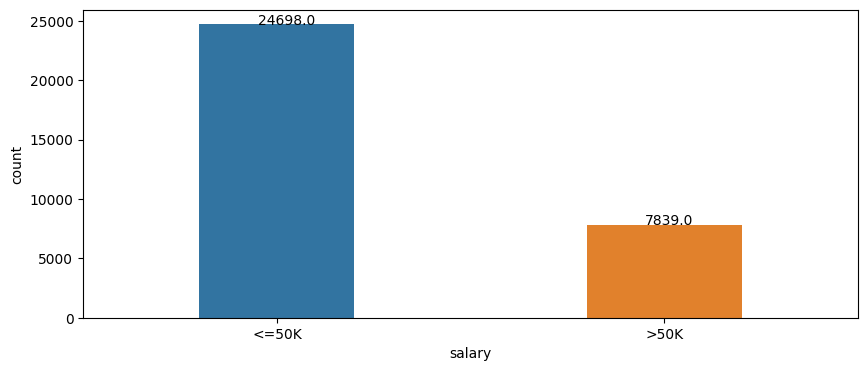

In [300]:
# Your Code is Here
plt.figure(figsize=(10,4))

ax_df =sns.countplot(data= df , x = df['salary'],width= 0.4);

for p in ax_df.patches:
    ax_df.annotate((p.get_height()), (p.get_x() + 0.15, p.get_height() + 1));

**Check the percentage of person in each "salary" levels and visualize it with a pieplot**

In [301]:
# Your Code is Here

df2= pd.DataFrame(df['salary'].value_counts(normalize= True))    #df.salary.value_counts()/df.shape[0]
df2

salary
<=50K  0.759074
>50K   0.240926

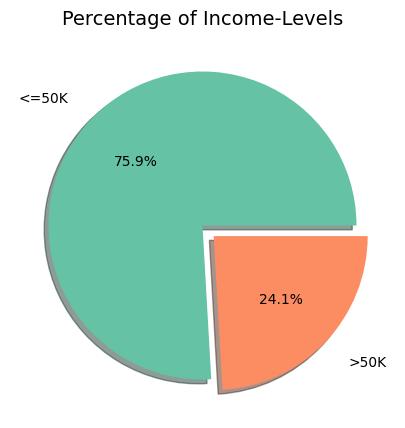

In [302]:
# Your Code is Here

plt.figure(figsize=(10, 5))
plt.pie(df2.salary, labels = df2.index,explode =[0,0.1],
        labeldistance=1.2,autopct ="%.1f%%",normalize=True,
        colors = sns.color_palette('Set2')  ,shadow = True )
plt.title("Percentage of Income-Levels",fontsize= 14)
plt.show()


**Write down the conclusions you draw from your analysis**

**Result :** %75.9 of people work for <=50K, %24.1 of people work for >50K

## Numeric Features

## age

**Check the boxplot to see extreme values**

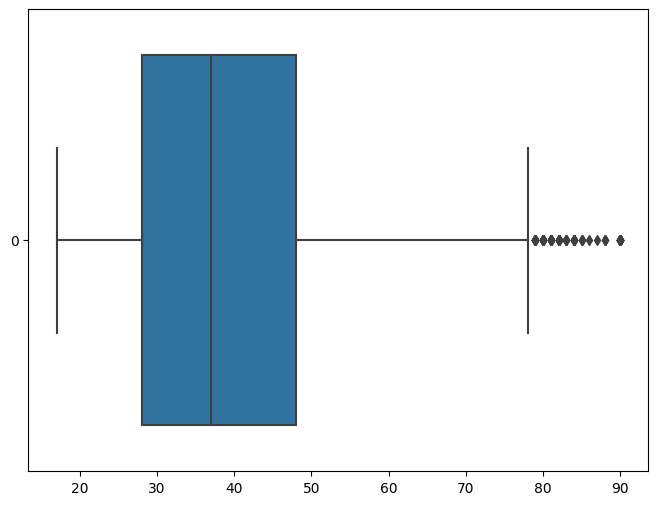

In [303]:
plt.figure(figsize =(8,6))
sns.boxplot(data = df.age,orient='h') ;

**Check the histplot/kdeplot to see distribution of feature**

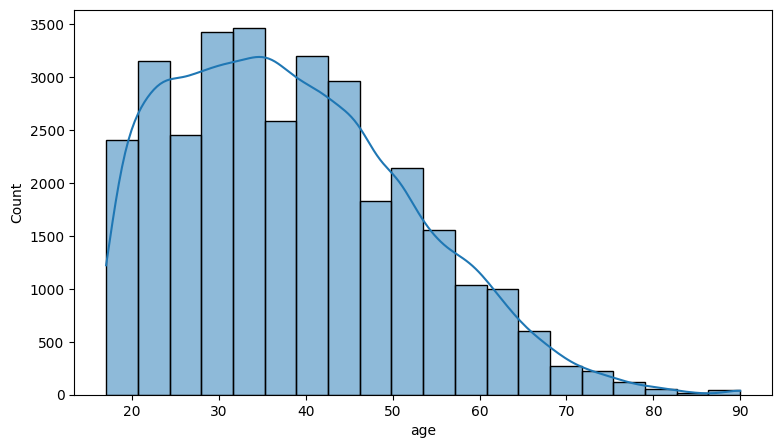

In [304]:
plt.figure(figsize =(9,5))
sns.histplot(data=df,x = df.age,kde = True,bins =20);

**Check the statistical values**

In [305]:
df.age.describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

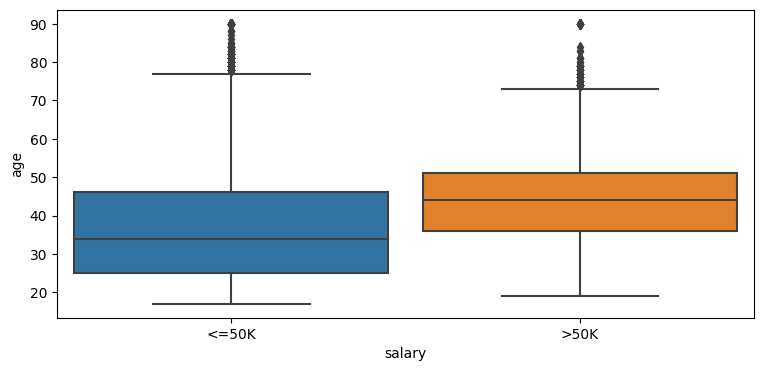

In [306]:

plt.figure(figsize =(9,4))
sns.boxplot(data =df ,x = 'salary', y ='age' ,width = 0.9 );

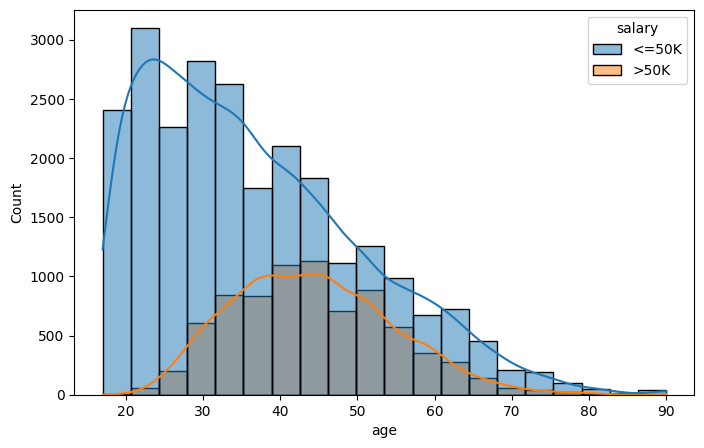

In [307]:
plt.figure(figsize =(8,5))
sns.histplot(data=df, x = 'age',kde =True ,hue = 'salary',bins=20);

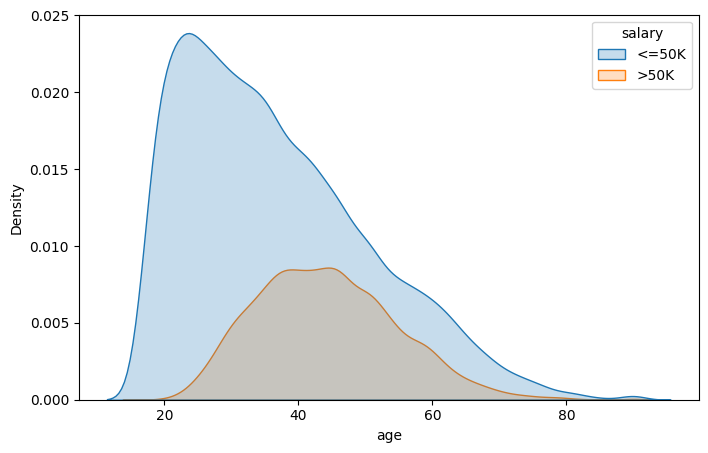

In [308]:
plt.figure(figsize =(8,5))

sns.kdeplot(data = df , x = 'age', hue = 'salary',shade = True);

**Check the statistical values by "salary" levels**

In [309]:
df.groupby('salary')['age'].describe()

count       mean        std   min   25%   50%   75%   max
salary                                                             
<=50K   24698.0  36.787392  14.017335  17.0  25.0  34.0  46.0  90.0
>50K     7839.0  44.250925  10.520102  19.0  36.0  44.0  51.0  90.0

**Write down the conclusions you draw from your analysis**

**Result :** The people with high income are older than the people with lower income.

## fnlwgt

**Check the boxplot to see extreme values**

In [310]:
df.head()

age workclass  fnlwgt     education  education_num marital_status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race  gender  capital_gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital_loss  hours_per_week native_country salary  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

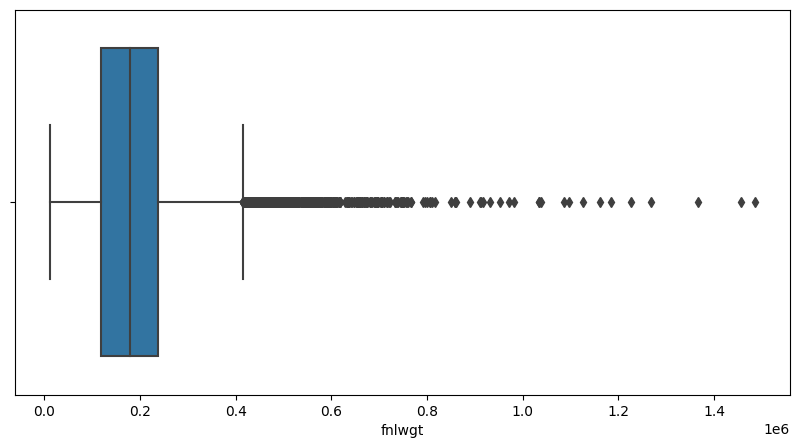

In [311]:
plt.figure(figsize =(10,5))

sns.boxplot(data=df, x = 'fnlwgt');

**Check the histplot/kdeplot to see distribution of feature**

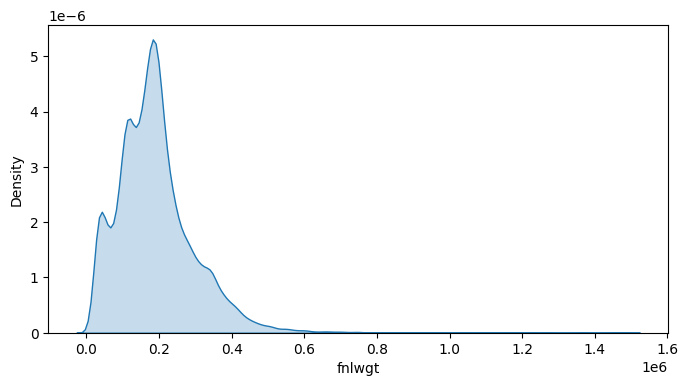

In [312]:
plt.figure(figsize=(8,4))
sns.kdeplot(data= df , x = 'fnlwgt', shade = True);      


**Check the statistical values**

In [313]:
df.fnlwgt.describe()


count    3.253700e+04
mean     1.897808e+05
std      1.055565e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.369930e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

<AxesSubplot: xlabel='salary', ylabel='fnlwgt'>

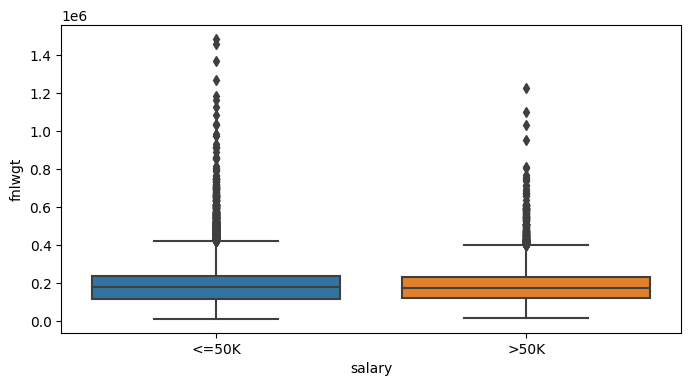

In [314]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x = 'salary',y='fnlwgt')

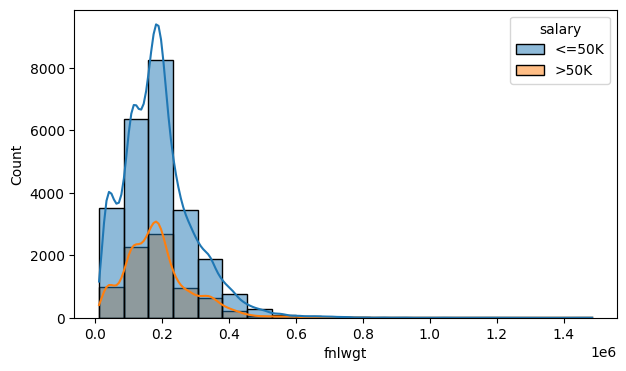

In [315]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='fnlwgt',hue = 'salary',kde=True,bins = 20);

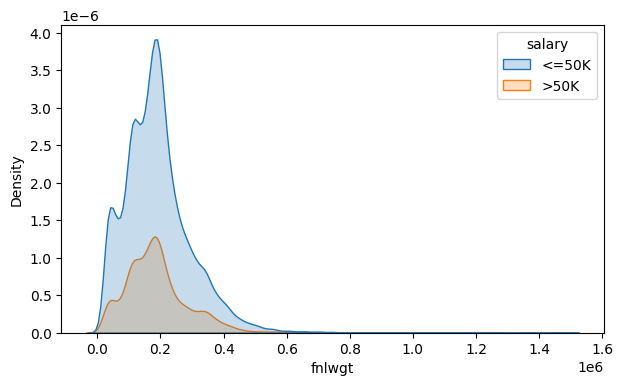

In [316]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x='fnlwgt',hue = 'salary',shade=True);

**Check the statistical values by "salary" levels**

In [317]:
df.groupby('salary')['fnlwgt'].describe()

count           mean            std      min       25%       50%  \
salary                                                                       
<=50K   24698.0  190345.926796  106487.413197  12285.0  117606.0  179465.0   
>50K     7839.0  188000.480674  102554.464101  14878.0  119100.0  176063.0   

              75%        max  
salary                        
<=50K   238968.25  1484705.0  
>50K    230969.00  1226583.0

**Write down the conclusions you draw from your analysis**

**Result :** The fnlwgt feature doesn't give us any insight at this point.

## capital_gain

**Check the boxplot to see extreme values**

In [318]:
df.head(5)

age workclass  fnlwgt     education  education_num marital_status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race  gender  capital_gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital_loss  hours_per_week native_country salary  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

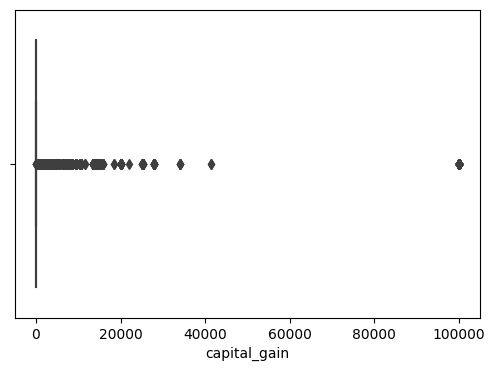

In [319]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='capital_gain');

**Check the histplot/kdeplot to see distribution of feature**

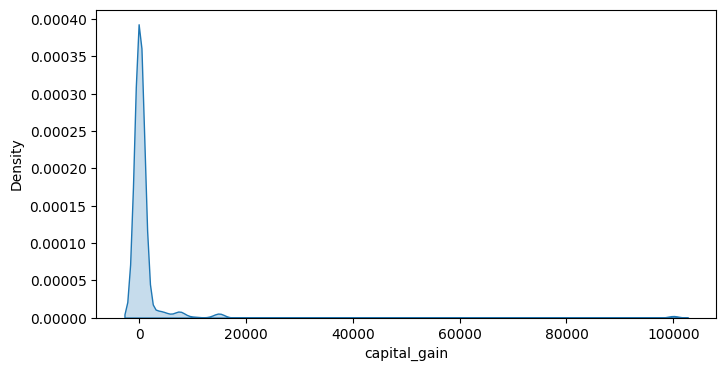

In [320]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df, x='capital_gain',shade=True);

**Check the statistical values**

In [321]:
df.capital_gain.describe()

count    32537.000000
mean      1078.443741
std       7387.957424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

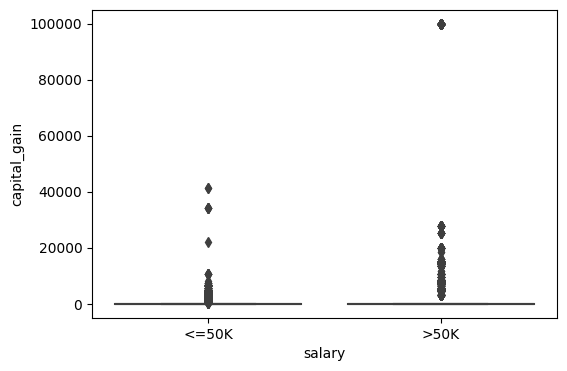

In [322]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='salary',y = 'capital_gain');

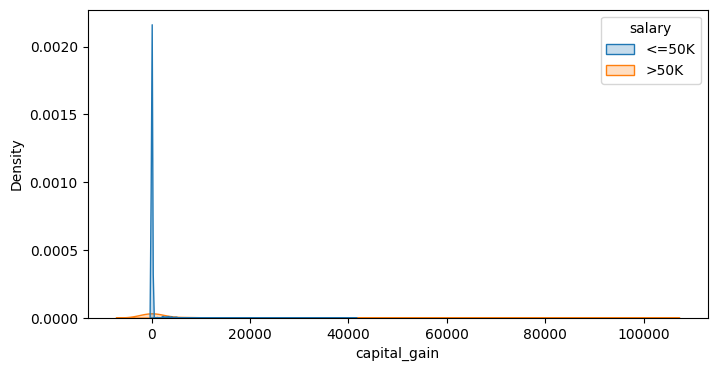

In [323]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df, x='capital_gain',hue = 'salary',shade=True);

**Check the statistical values by "salary" levels**

In [324]:
df.groupby('salary').capital_gain.describe()

count         mean           std  min  25%  50%  75%      max
salary                                                                 
<=50K   24698.0   148.884970    963.557955  0.0  0.0  0.0  0.0  41310.0
>50K     7839.0  4007.164562  14572.097223  0.0  0.0  0.0  0.0  99999.0

**Check the statistical values by "salary" levels for capital_gain not equal the zero**

In [325]:
df[df['capital_gain']==0].value_counts().sum()

29825

In [326]:
df[df['capital_gain']>0].groupby('salary')['capital_gain'].describe()

count         mean           std     min     25%     50%      75%  \
salary                                                                       
<=50K   1035.0   3552.81256   3173.419287   114.0  2202.0  3273.0   4101.0   
>50K    1677.0  18731.16458  26778.676066  3103.0  7298.0  7896.0  15024.0   

            max  
salary           
<=50K   41310.0  
>50K    99999.0

**Write down the conclusions you draw from your analysis**

**Result :** Although it has a lot of zero value, we can say that more capital gain is more high income.

## capital_loss

**Check the boxplot to see extreme values**

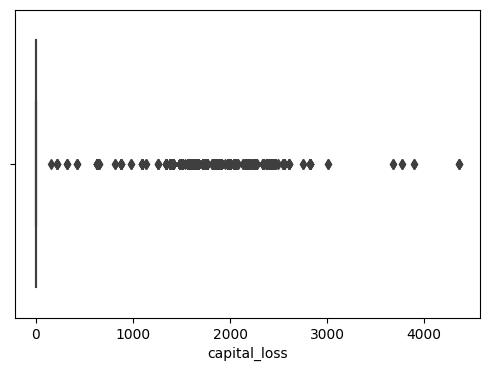

In [327]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='capital_loss');

**Check the histplot/kdeplot to see distribution of feature**

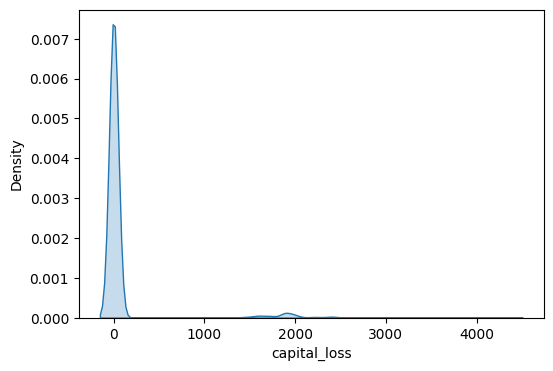

In [328]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='capital_loss',shade=True);

**Check the statistical values**

In [329]:
df.capital_loss.describe()

count    32537.000000
mean        87.368227
std        403.101833
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

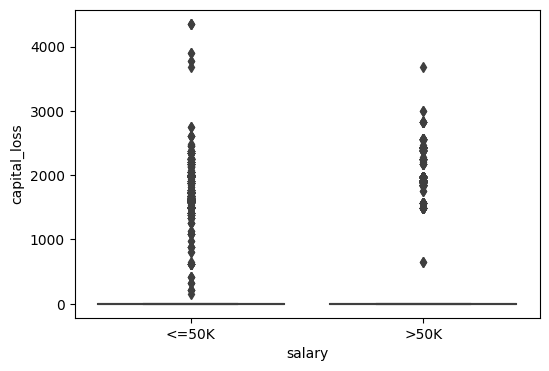

In [330]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, y='capital_loss',x = 'salary');

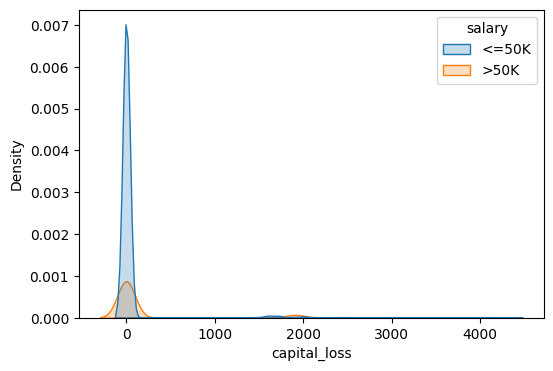

In [331]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df,x = 'capital_loss',hue='salary',shade=True);

**Check the statistical values by "salary" levels**

In [332]:
df.groupby('salary').capital_loss.describe()

count        mean         std  min  25%  50%  75%     max
salary                                                             
<=50K   24698.0   53.190258  310.890099  0.0  0.0  0.0  0.0  4356.0
>50K     7839.0  195.051282  595.555395  0.0  0.0  0.0  0.0  3683.0

**Check the statistical values by "salary" levels for capital_loss not equel the zero**

In [333]:
df[df['capital_loss']>0].groupby('salary')['capital_loss'].describe()

count         mean         std    min     25%     50%     75%     max
salary                                                                       
<=50K   746.0  1760.982574  438.906164  155.0  1590.0  1721.0  1980.0  4356.0
>50K    773.0  1978.016818  264.143642  653.0  1887.0  1902.0  1977.0  3683.0

**Write down the conclusions you draw from your analysis**

**Result :** There is no significant difference between high and low-income groups according to the "capital_loss" feature.

## hours_per_week

**Check the boxplot to see extreme values**

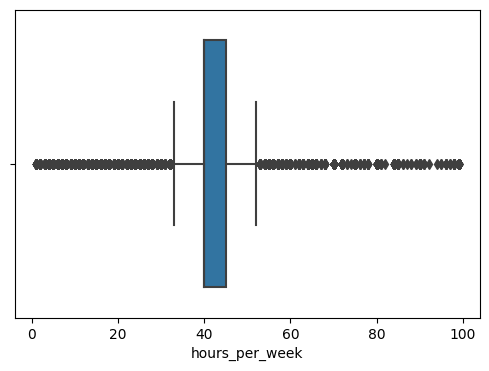

In [334]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='hours_per_week');

**Check the histplot/kdeplot to see distribution of feature**

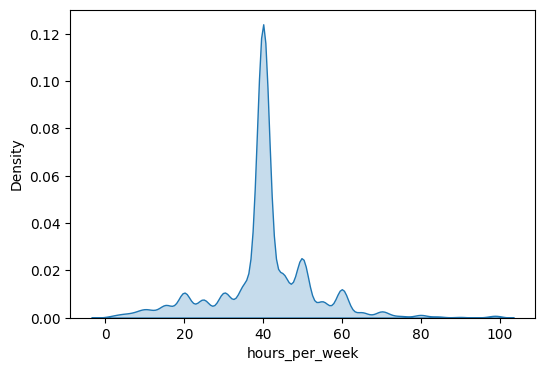

In [335]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='hours_per_week',shade=True);

**Check the statistical values**

In [336]:
df.hours_per_week.describe()

count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

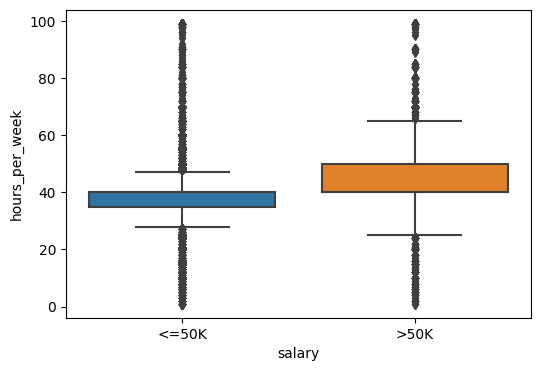

In [337]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='salary', y='hours_per_week');

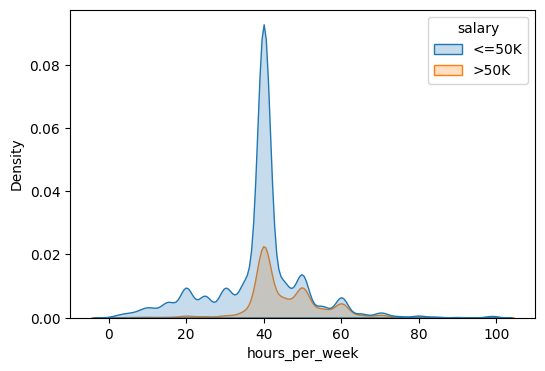

In [338]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='hours_per_week',hue = 'salary',shade=True);

**Check the statistical values by "salary" levels**

In [339]:
df.groupby('salary')['hours_per_week'].describe()

count       mean        std  min   25%   50%   75%   max
salary                                                            
<=50K   24698.0  38.842862  12.318286  1.0  35.0  40.0  40.0  99.0
>50K     7839.0  45.473402  11.014165  1.0  40.0  40.0  50.0  99.0

**Write down the conclusions you draw from your analysis**

**Result :** Although the weekly working hours are spread over a wider range in the high-income group, we can say that the average weekly working hours of the high-income group is higher than that of the low-income group.

### See the relationship between each numeric features by target feature (salary) in one plot basically

In [340]:
df_numeric = pd.DataFrame(df.select_dtypes(include=np.number))
df_numeric['salary'] = df.salary

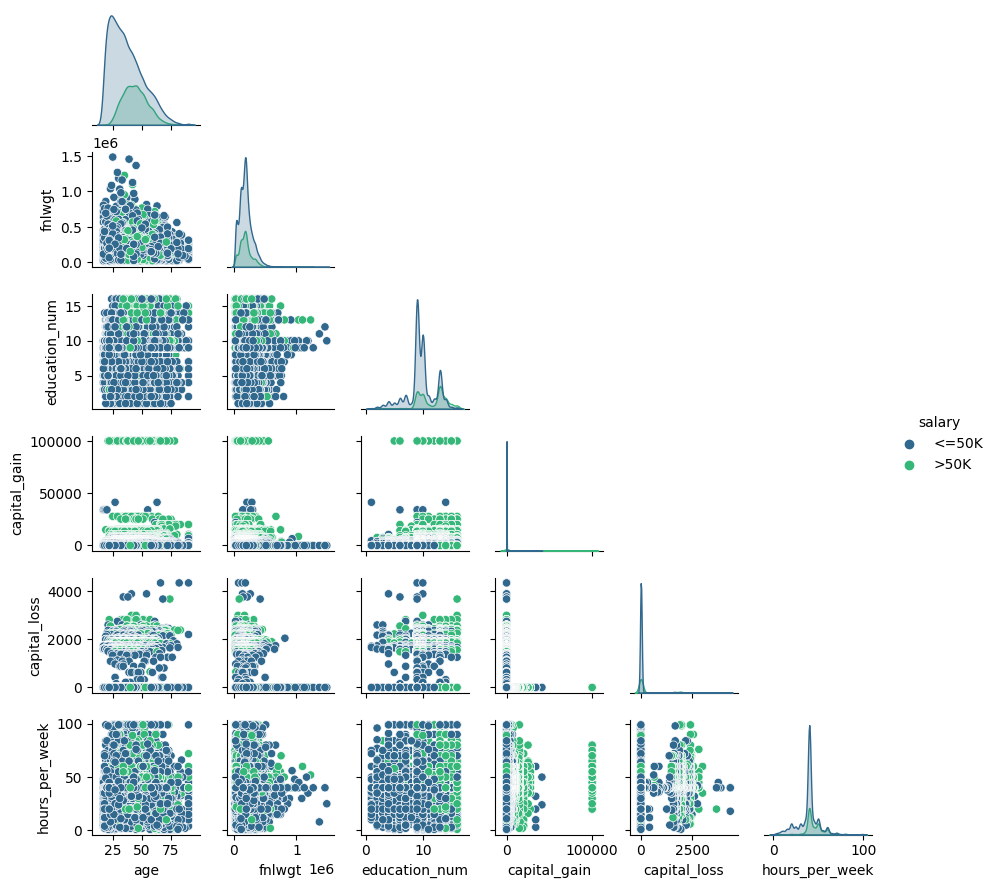

In [341]:
sns.pairplot(df,hue="salary",palette="viridis",corner=True,diag_kind="kde",height=1.5);

## Categorical Features

In [342]:
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'salary'],
      dtype='object')

## education & education_num

**Detect the similarities between these features by comparing unique values**

In [343]:
df.education.value_counts().sort_values(ascending=False)

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [344]:
df.education_num.value_counts().sort_values(ascending=False)

9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education_num, dtype: int64

In [345]:
df.groupby('education')['education_num'].value_counts(dropna=False)

education     education_num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  166
5th-6th       3                  332
7th-8th       4                  645
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5353
Doctorate     16                 413
HS-grad       9                10494
Masters       14                1722
Preschool     1                   50
Prof-school   15                 576
Some-college  10                7282
Name: education_num, dtype: int64

**Visualize the count of person in each categories for these features (education, education_num) separately**

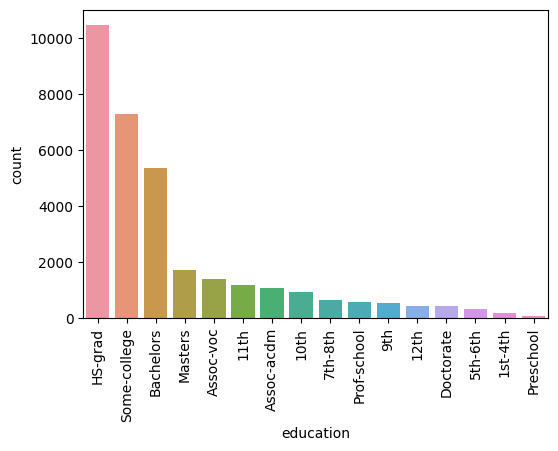

In [346]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=90)
sns.countplot(data=df ,x = df.education,order = df.education.value_counts().index[::1]);

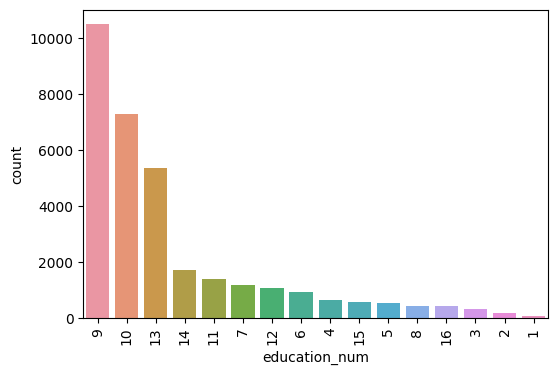

In [347]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=90)
sns.countplot(data=df ,x = df.education_num, order = df.education_num.value_counts().index[::1]);

**Check the count of person in each "salary" levels by these features (education and education_num) separately and visualize them with countplot**

In [348]:
df.groupby('education')['salary'].value_counts()

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: salary, dtype: int64

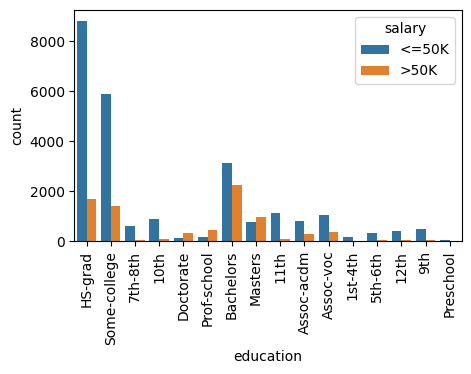

In [349]:
plt.figure(figsize=(5,3))
plt.xticks(rotation=90)
sns.countplot(data=df , x = df.education , hue = 'salary');

In [350]:
df.groupby('education_num').salary.value_counts()

education_num  salary
1              <=50K       50
2              <=50K      160
               >50K         6
3              <=50K      316
               >50K        16
4              <=50K      605
               >50K        40
5              <=50K      487
               >50K        27
6              <=50K      871
               >50K        62
7              <=50K     1115
               >50K        60
8              <=50K      400
               >50K        33
9              <=50K     8820
               >50K      1674
10             <=50K     5896
               >50K      1386
11             <=50K     1021
               >50K       361
12             <=50K      802
               >50K       265
13             <=50K     3132
               >50K      2221
14             >50K       959
               <=50K      763
15             >50K       423
               <=50K      153
16             >50K       306
               <=50K      107
Name: salary, dtype: int64

**Visualize the boxplot of "education_num" feature by "salary" levels**

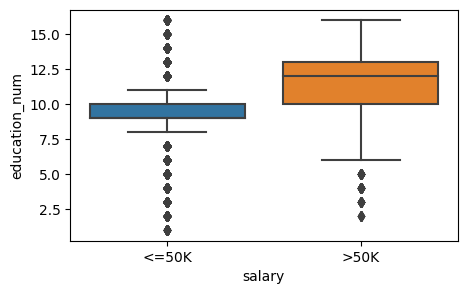

In [351]:
plt.figure(figsize=(5,3))

sns.boxplot(data=df , x = df.salary ,y=df.education_num);

**Decrease the number of categories in "education" feature as low, medium, and high level and create a new feature with this new categorical data.**

In [352]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
        return "low_level_grade"
    elif x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
        return "medium_level_grade"
    elif x in ["Bachelors", "Masters", "Prof-school", "Doctorate"]:
        return "high_level_grade"

In [353]:
df.education.apply(mapping_education).value_counts()

medium_level_grade    20225
high_level_grade       8064
low_level_grade        4248
Name: education, dtype: int64

In [354]:
df['education_summary'] = df.education.apply(mapping_education)

**Visualize the count of person in each categories for these new education levels (high, medium, low)**

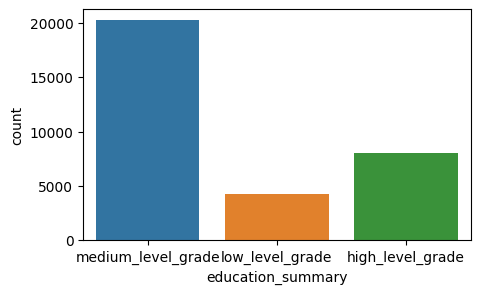

In [355]:
plt.figure(figsize=(5,3))

sns.countplot(data=df , x = df.education_summary);

**Check the count of person in each "salary" levels by these new education levels(high, medium, low) and visualize it with countplot**

In [356]:
df.groupby('education_summary')['salary'].value_counts()

education_summary   salary
high_level_grade    <=50K      4155
                    >50K       3909
low_level_grade     <=50K      4004
                    >50K        244
medium_level_grade  <=50K     16539
                    >50K       3686
Name: salary, dtype: int64

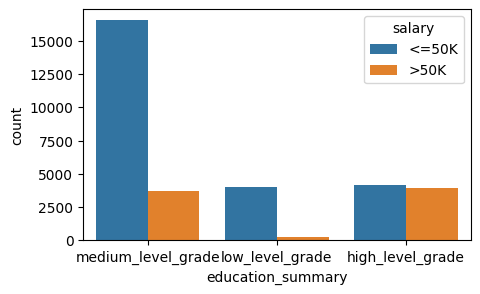

In [357]:
plt.figure(figsize=(5,3))

sns.countplot(data=df , x = df.education_summary, hue = 'salary');


**Check the percentage distribution of person in each "salary" levels by each new education levels (high, medium, low) and visualize it with pie plot separately**

In [358]:
df.groupby('education_summary')['salary'].value_counts(normalize=True)

education_summary   salary
high_level_grade    <=50K     0.515253
                    >50K      0.484747
low_level_grade     <=50K     0.942561
                    >50K      0.057439
medium_level_grade  <=50K     0.817750
                    >50K      0.182250
Name: salary, dtype: float64

In [359]:
high_level_grade = np.array(df[df['education_summary']=='high_level_grade']['salary'].value_counts())
low_level_grade = np.array(df[df['education_summary']=='low_level_grade']['salary'].value_counts())
medium_level_grade = np.array(df[df['education_summary']=='medium_level_grade']['salary'].value_counts())
medium_level_grade

array([16539,  3686], dtype=int64)

In [360]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

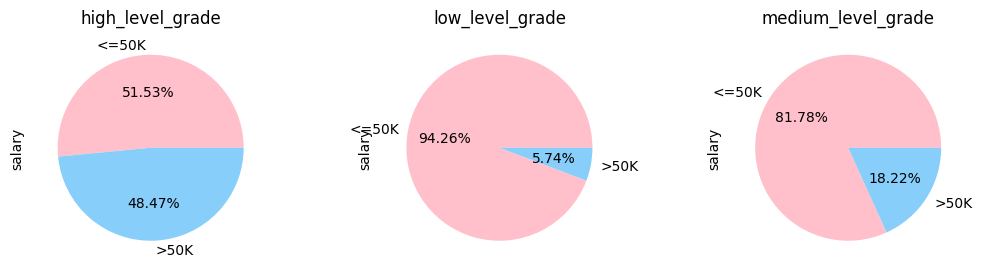

In [361]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0)
ax1.pie(x=high_level_grade,labels=["<=50K",">50K"],autopct="%.2f%%",colors=["pink","lightskyblue"])
ax1.set_title("high_level_grade")
ax1.set_ylabel("salary")
ax2.pie(x=low_level_grade,labels=["<=50K",">50K"],autopct="%.2f%%",colors=["pink","lightskyblue"])
ax2.set_title("low_level_grade")
ax2.set_ylabel("salary")
ax3.pie(x=medium_level_grade,labels=["<=50K",">50K"],autopct="%.2f%%",colors=["pink","lightskyblue"])
ax3.set_title("medium_level_grade")
ax3.set_ylabel("salary");

**Check the count of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with countplot**

In [362]:
df.groupby('salary')['education_summary'].value_counts()


salary  education_summary 
<=50K   medium_level_grade    16539
        high_level_grade       4155
        low_level_grade        4004
>50K    high_level_grade       3909
        medium_level_grade     3686
        low_level_grade         244
Name: education_summary, dtype: int64

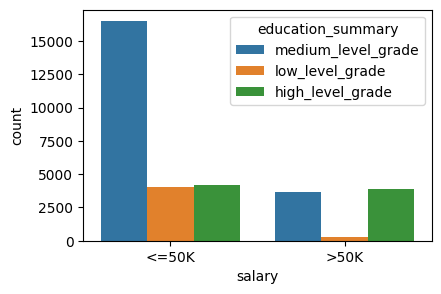

In [363]:
sns.countplot(data =df, x = 'salary', hue = df.education_summary);

**Check the the percentage distribution of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with pie plot separately**

In [364]:
df5= pd.DataFrame(df.groupby('salary')['education_summary'].value_counts(normalize= True))
df5

education_summary
salary education_summary                    
<=50K  medium_level_grade           0.669649
       high_level_grade             0.168232
       low_level_grade              0.162118
>50K   high_level_grade             0.498661
       medium_level_grade           0.470213
       low_level_grade              0.031126

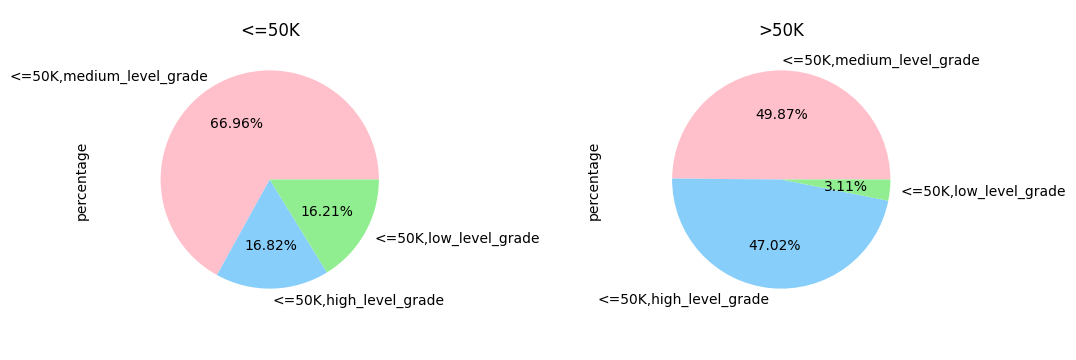

In [365]:
fig, (ax1, ax2) = plt.subplots(ncols =2 , figsize = (11,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0)
ax1.pie(x = df5.iloc[0:3].education_summary ,radius = 0.8, labels = ['<=50K,medium_level_grade','<=50K,high_level_grade','<=50K,low_level_grade'],
        autopct="%.2f%%",colors=["pink","lightskyblue","lightgreen"])
ax2.pie(x = df5.iloc[3:6].education_summary , radius = 0.8,labels = ['<=50K,medium_level_grade','<=50K,high_level_grade','<=50K,low_level_grade'],
        autopct="%.2f%%",colors=["pink","lightskyblue","lightgreen"])
ax1.set_title("<=50K", y = 0.9)
ax1.set_ylabel("percentage",loc='center')
ax2.set_title(">50K" , y = 0.9)
ax2.set_ylabel("percentage");

In [366]:
df6 = df5
df6.rename(columns={'education_summary':'percentage'},inplace= True)

In [367]:
df6.reset_index(inplace=True)

In [368]:
df6

salary   education_summary  percentage
0  <=50K  medium_level_grade    0.669649
1  <=50K    high_level_grade    0.168232
2  <=50K     low_level_grade    0.162118
3   >50K    high_level_grade    0.498661
4   >50K  medium_level_grade    0.470213
5   >50K     low_level_grade    0.031126

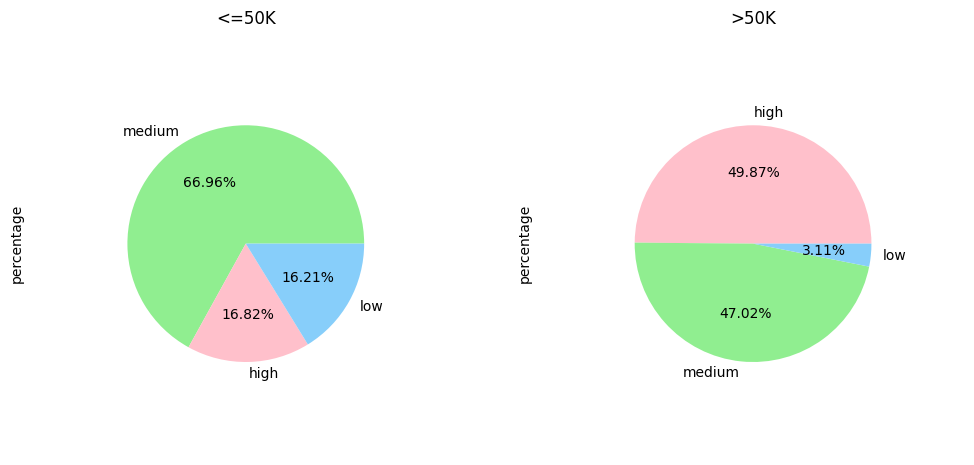

In [369]:
fig, (ax1, ax2) = plt.subplots(ncols =2 , figsize = (12,6))

ax1.pie(x = df6.iloc[0:3].percentage ,radius = 0.7, labels = ['medium','high','low'],
        autopct="%.2f%%",colors=["lightgreen","pink","lightskyblue"])
ax2.pie(x = df6.iloc[3:6].percentage , radius = 0.7,labels = ['high','medium','low'],
        autopct="%.2f%%",colors=["pink","lightgreen","lightskyblue"])
ax1.set_title("<=50K")
ax1.set_ylabel("percentage",loc='center')
ax2.set_title(">50K")
ax2.set_ylabel("percentage");


**Write down the conclusions you draw from your analysis**

**Result :** Education level and income level increase in direct proportion.

## marital_status & relationship

**Detect the similarities between these features by comparing unique values**

In [370]:
df.marital_status.value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [371]:
df.relationship.value_counts(dropna =False)

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [372]:
df.fillna("Unknown",inplace=True)

In [373]:
df.relationship.value_counts()

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [374]:
df.groupby('relationship')['marital_status'].value_counts()

relationship    marital_status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Own-child       Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

**Visualize the count of person in each categories**

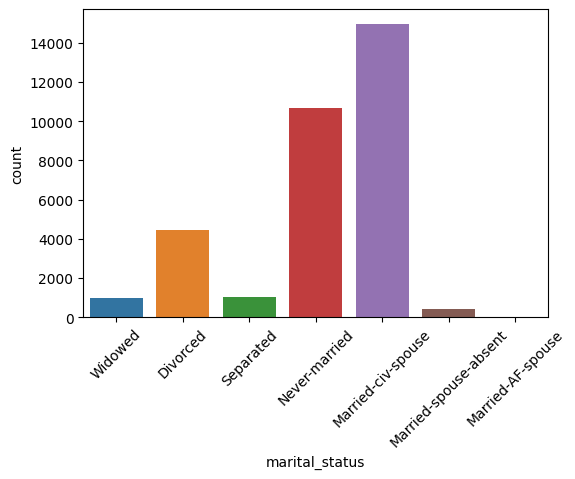

In [375]:
plt.figure(figsize = (6,4))
plt.xticks(rotation = 45)
sns.countplot(data= df , x = 'marital_status' );

**Check the count of person in each "salary" levels by categories and visualize it with countplot**

In [376]:
df.groupby('marital_status')['salary'].value_counts()

marital_status         salary
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: salary, dtype: int64

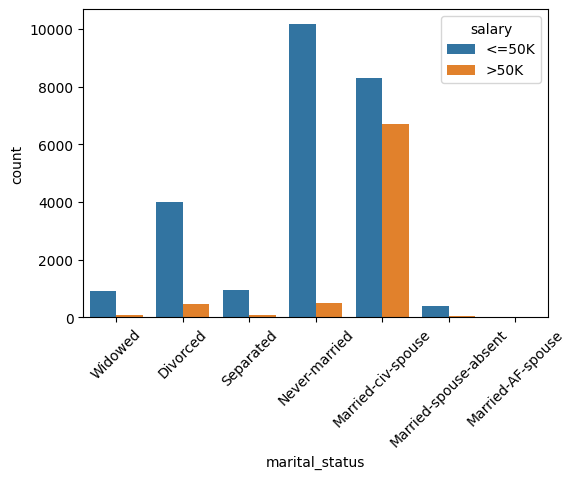

In [377]:
plt.figure(figsize = (6,4))
plt.xticks(rotation = 45)
sns.countplot(data= df , x = 'marital_status' ,hue = 'salary');

**Decrease the number of categories in "marital_status" feature as married, and unmarried and create a new feature with this new categorical data**

In [378]:
def mapping_marital_status(x):
    if x in ["Never-married", "Divorced", "Separated", "Widowed"]:
        return "unmarried"
    elif x in ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"]:
        return "married"

In [379]:
df.marital_status.apply(mapping_marital_status).value_counts()

unmarried    17126
married      15411
Name: marital_status, dtype: int64

In [380]:
df['marital_status_summary'] = df.marital_status.apply(mapping_marital_status)

In [381]:
df['marital_status_summary']

0        unmarried
1        unmarried
2        unmarried
3        unmarried
4        unmarried
           ...    
32556    unmarried
32557      married
32558      married
32559    unmarried
32560    unmarried
Name: marital_status_summary, Length: 32537, dtype: object

**Visualize the count of person in each categories for these new marital status (married, unmarried)**

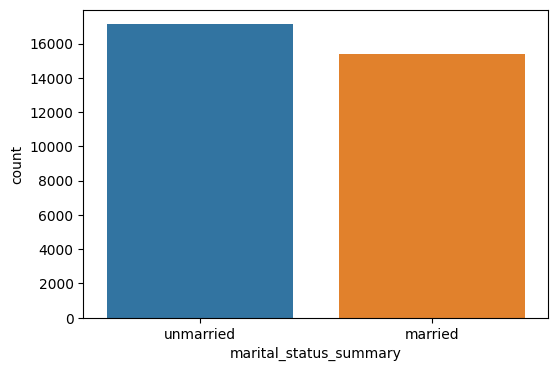

In [382]:
plt.figure(figsize = (6,4))
sns.countplot(data= df , x = 'marital_status_summary');

**Check the count of person in each "salary" levels by these new marital status (married, unmarried) and visualize it with countplot**

In [383]:
df.groupby('marital_status_summary').salary.value_counts()

marital_status_summary  salary
married                 <=50K      8677
                        >50K       6734
unmarried               <=50K     16021
                        >50K       1105
Name: salary, dtype: int64

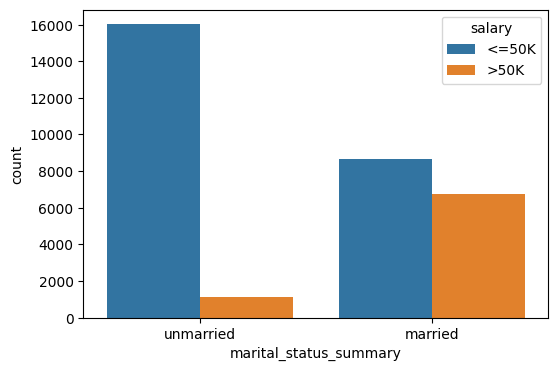

In [384]:
plt.figure(figsize = (6,4))
sns.countplot(data= df, x = 'marital_status_summary',hue ='salary');

**Check the percentage distribution of person in each "salary" levels by each new marital status (married, unmarried) and visualize it with pie plot separately**

In [385]:
df.groupby('marital_status_summary').salary.value_counts(normalize=True)

marital_status_summary  salary
married                 <=50K     0.563039
                        >50K      0.436961
unmarried               <=50K     0.935478
                        >50K      0.064522
Name: salary, dtype: float64

In [386]:
df7 = pd.DataFrame(df.groupby('marital_status_summary').salary.value_counts(normalize=True))

In [387]:
df7.rename(columns = {'salary': 'percentage'} ,inplace =True)

In [388]:
df7.reset_index(inplace= True)

In [389]:
df7

marital_status_summary salary  percentage
0                married  <=50K    0.563039
1                married   >50K    0.436961
2              unmarried  <=50K    0.935478
3              unmarried   >50K    0.064522

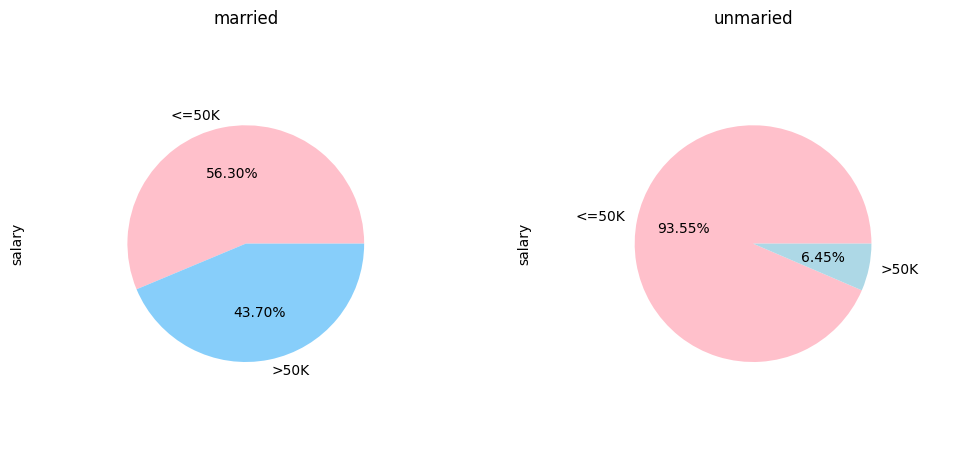

In [390]:
fig, (ax1, ax2) = plt.subplots(ncols =2 , figsize = (12,6))

ax1.pie(x = df7.iloc[0:2].percentage ,radius = 0.7, labels = ['<=50K','>50K'],
        autopct="%.2f%%",colors=["pink","lightskyblue"])
ax2.pie(x = df7.iloc[2:4].percentage , radius = 0.7,labels =  ['<=50K','>50K'],
        autopct="%.2f%%",colors=["pink","lightblue"])
ax1.set_title("married")
ax1.set_ylabel("salary",loc='center')
ax2.set_title("unmaried")
ax2.set_ylabel("salary");


**Check the count of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with countplot**

In [391]:
df.groupby('salary').marital_status_summary.value_counts()

salary  marital_status_summary
<=50K   unmarried                 16021
        married                    8677
>50K    married                    6734
        unmarried                  1105
Name: marital_status_summary, dtype: int64

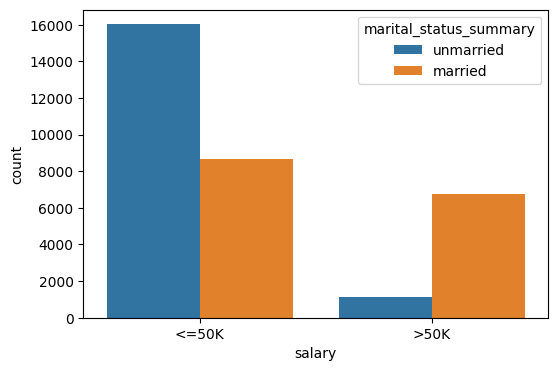

In [392]:
plt.figure(figsize = (6,4))
sns.countplot(data= df, x ='salary' ,hue ='marital_status_summary');

**Check the the percentage distribution of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with pie plot separately**

In [393]:
df.groupby('salary').marital_status_summary.value_counts(normalize = True)

salary  marital_status_summary
<=50K   unmarried                 0.648676
        married                   0.351324
>50K    married                   0.859038
        unmarried                 0.140962
Name: marital_status_summary, dtype: float64

In [394]:
df8= pd.DataFrame(df.groupby('salary').marital_status_summary.value_counts(normalize = True))

In [395]:
df8.rename(columns = {'marital_status_summary':'percentage'},inplace = True ) 

In [396]:
df8.reset_index()

salary marital_status_summary  percentage
0  <=50K              unmarried    0.648676
1  <=50K                married    0.351324
2   >50K                married    0.859038
3   >50K              unmarried    0.140962

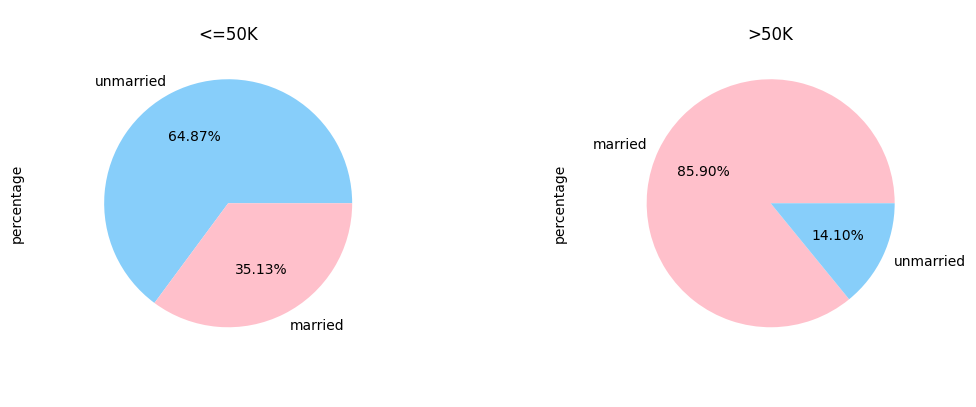

In [397]:
fig, (ax1, ax2) = plt.subplots(ncols =2 , figsize = (12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
ax1.pie(x = df8.iloc[0:2].percentage ,radius = 0.8, labels = ['unmarried','married'],
        autopct="%.2f%%",colors=["lightskyblue","pink"])
ax2.pie(x = df8.iloc[2:4].percentage , radius = 0.8,labels =  ['married','unmarried'],
        autopct="%.2f%%",colors=["pink","lightskyblue"])
ax1.set_title("<=50K",y = 0.9)
ax1.set_ylabel("percentage",x = 0.9)
ax2.set_title(">50K",y = 0.9)
ax2.set_ylabel("percentage");


**Write down the conclusions you draw from your analysis**

**Result :** Married people has higher income level than unmaried people

## workclass

**Check the count of person in each categories and visualize it with countplot**

In [398]:
df.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

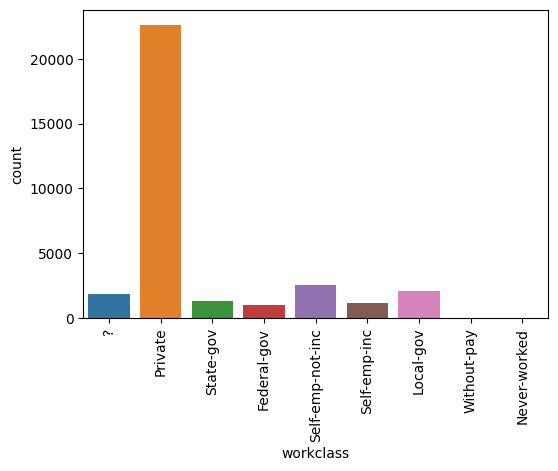

In [399]:
plt.figure(figsize = (6,4))
plt.xticks(rotation=90)
sns.countplot(data= df, x ='workclass');

**Replace the value "?" to the value "Unknown"** 

In [400]:
df.workclass.replace({'?':'Unknown'},inplace = True)

**Check the count of person in each "salary" levels by workclass groups and visualize it with countplot**

In [401]:
df.groupby('workclass')['salary'].value_counts()

workclass         salary
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Unknown           <=50K      1645
                  >50K        191
Without-pay       <=50K        14
Name: salary, dtype: int64

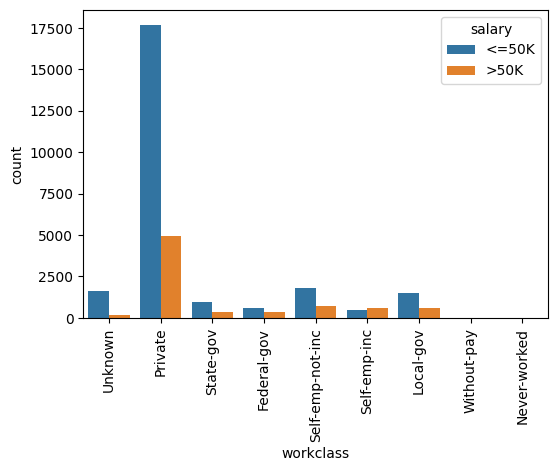

In [402]:
plt.figure(figsize = (6,4))
plt.xticks(rotation = 90)
sns.countplot(data= df, x ='workclass' ,hue ='salary');

**Check the percentage distribution of person in each "salary" levels by each workclass groups and visualize it with bar plot**

In [403]:
df.groupby('workclass')['salary'].value_counts(normalize = True)

workclass         salary
Federal-gov       <=50K     0.613542
                  >50K      0.386458
Local-gov         <=50K     0.705208
                  >50K      0.294792
Never-worked      <=50K     1.000000
Private           <=50K     0.781193
                  >50K      0.218807
Self-emp-inc      >50K      0.557348
                  <=50K     0.442652
Self-emp-not-inc  <=50K     0.714961
                  >50K      0.285039
State-gov         <=50K     0.728043
                  >50K      0.271957
Unknown           <=50K     0.895969
                  >50K      0.104031
Without-pay       <=50K     1.000000
Name: salary, dtype: float64

In [404]:
df9 =pd.DataFrame(df.groupby('workclass')['salary'].value_counts(normalize = True))

In [405]:
df9.rename(columns = {'salary':'percentage'},inplace = True )

In [406]:
df9.reset_index(inplace=True)

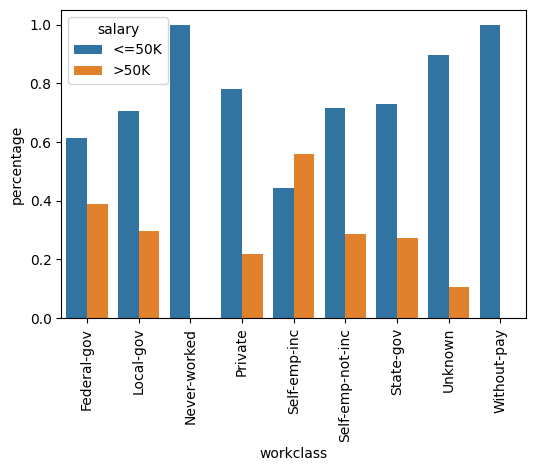

In [407]:
plt.figure(figsize = (6,4))
plt.xticks(rotation = 90)
sns.barplot(data= df9, x =df9.workclass,y = df9.percentage ,hue ='salary');
## Federal gov salaries must be higher than local gov and state gov. Self inc. earns more than not inc .

**Check the count of person in each workclass groups by "salary" levels and visualize it with countplot**

In [408]:
df.groupby('salary').workclass.value_counts()

salary  workclass       
<=50K   Private             17712
        Self-emp-not-inc     1816
        Unknown              1645
        Local-gov            1476
        State-gov             945
        Federal-gov           589
        Self-emp-inc          494
        Without-pay            14
        Never-worked            7
>50K    Private              4961
        Self-emp-not-inc      724
        Self-emp-inc          622
        Local-gov             617
        Federal-gov           371
        State-gov             353
        Unknown               191
Name: workclass, dtype: int64

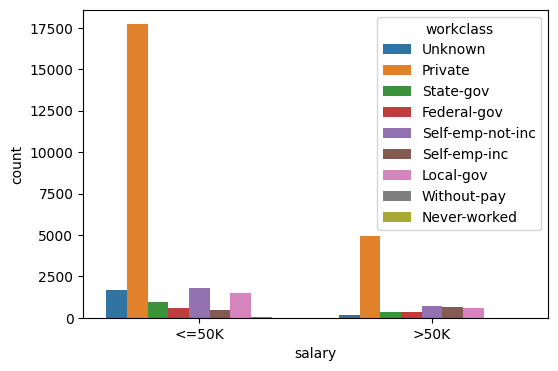

In [409]:
plt.figure(figsize = (6,4))
sns.countplot(data= df, x ='salary' ,hue ='workclass');
# The amount of people private workclass is much more than the others.

**Check the the percentage distribution of person in each workclass groups by "salary" levels and visualize it with countplot**

In [410]:
df.groupby('salary').workclass.value_counts(normalize = True)

salary  workclass       
<=50K   Private             0.717143
        Self-emp-not-inc    0.073528
        Unknown             0.066605
        Local-gov           0.059762
        State-gov           0.038262
        Federal-gov         0.023848
        Self-emp-inc        0.020002
        Without-pay         0.000567
        Never-worked        0.000283
>50K    Private             0.632861
        Self-emp-not-inc    0.092359
        Self-emp-inc        0.079347
        Local-gov           0.078709
        Federal-gov         0.047327
        State-gov           0.045031
        Unknown             0.024365
Name: workclass, dtype: float64

In [411]:
df10 = pd.DataFrame(df.groupby('salary').workclass.value_counts(normalize =True))

In [412]:
df10.rename(columns={'workclass':'percentage'},inplace=True)           

In [413]:
df10.reset_index(inplace= True)

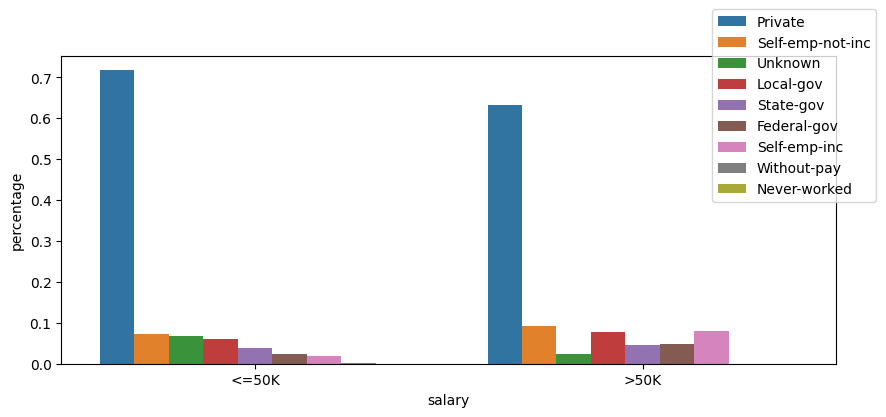

In [414]:
plt.figure(figsize = (10,4))
sns.barplot(data= df10, x ='salary' ,y = 'percentage',hue ='workclass');
plt.legend(loc=(0.84,0.525));

**Write down the conclusions you draw from your analysis**

**Result :** Self-emp-inc" work-class has a high ratio in the self group about high-level income. "Private" work-class has a high ratio in the high-income group about high-level income.

## occupation

**Check the count of person in each categories and visualize it with countplot**

In [415]:
df.occupation.value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

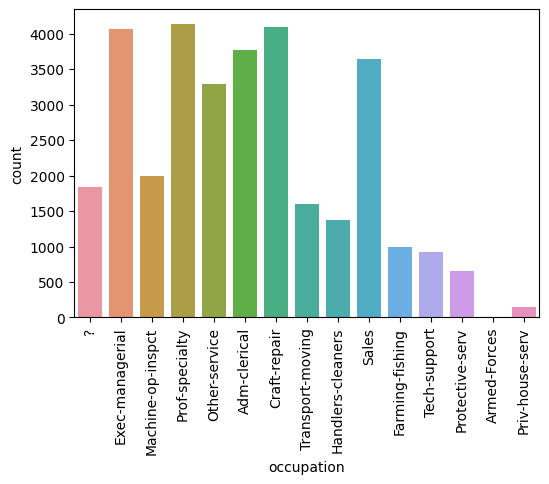

In [416]:
plt.figure(figsize = (6,4))
plt.xticks(rotation=90)
sns.countplot(data= df, x ='occupation' ,);

**Replace the value "?" to the value "Unknown"**

In [417]:
df.occupation.replace({'?':'Unknown'},inplace=True)

**Check the count of person in each "salary" levels by occupation groups and visualize it with countplot**

In [418]:
df.groupby('occupation').salary.value_counts()

occupation         salary
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=50K     1277
                   >50K       320
Unknown            <=5

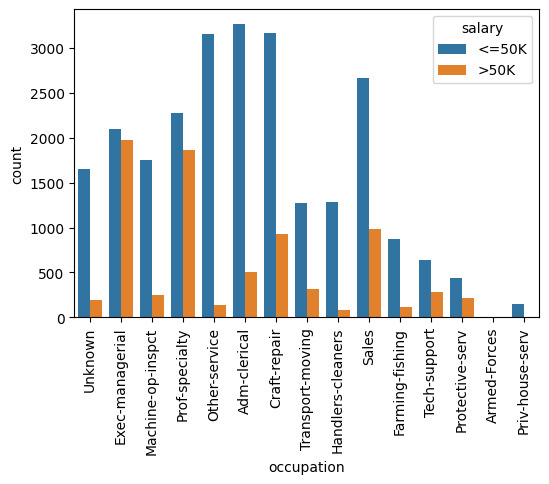

In [419]:
plt.figure(figsize = (6,4))
plt.xticks(rotation=90)
sns.countplot(data= df, x ='occupation' ,hue = 'salary');
#Exec - Managerial :Management executives are leaders within a company who design and implement systems for management improvement.
#They're highly organised and have extensive knowledge of leadership optimisation

**Check the percentage distribution of person in each "salary" levels by each occupation groups and visualize it with bar plot**

In [420]:
df.groupby('occupation').salary.value_counts(normalize=True)

occupation         salary
Adm-clerical       <=50K     0.865446
                   >50K      0.134554
Armed-Forces       <=50K     0.888889
                   >50K      0.111111
Craft-repair       <=50K     0.773083
                   >50K      0.226917
Exec-managerial    <=50K     0.515867
                   >50K      0.484133
Farming-fishing    <=50K     0.884073
                   >50K      0.115927
Handlers-cleaners  <=50K     0.937180
                   >50K      0.062820
Machine-op-inspct  <=50K     0.875500
                   >50K      0.124500
Other-service      <=50K     0.958371
                   >50K      0.041629
Priv-house-serv    <=50K     0.993197
                   >50K      0.006803
Prof-specialty     <=50K     0.550774
                   >50K      0.449226
Protective-serv    <=50K     0.674884
                   >50K      0.325116
Sales              <=50K     0.730685
                   >50K      0.269315
Tech-support       <=50K     0.694714
                   >50K 

In [421]:
df11 =pd.DataFrame(df.groupby('occupation').salary.value_counts(normalize=True))

In [422]:
df11.rename(columns={'salary' :'percentage'},inplace = True)
df11.reset_index(inplace=True)

**Check the count of person in each occupation groups by "salary" levels and visualize it with countplot**

In [423]:
# Your Code is Here

df.groupby('salary').occupation.value_counts()

salary  occupation       
<=50K   Adm-clerical         3261
        Craft-repair         3165
        Other-service        3154
        Sales                2667
        Prof-specialty       2278
        Exec-managerial      2097
        Machine-op-inspct    1751
        Unknown              1652
        Handlers-cleaners    1283
        Transport-moving     1277
        Farming-fishing       877
        Tech-support          644
        Protective-serv       438
        Priv-house-serv       146
        Armed-Forces            8
>50K    Exec-managerial      1968
        Prof-specialty       1858
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     249
        Protective-serv       211
        Unknown               191
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces  

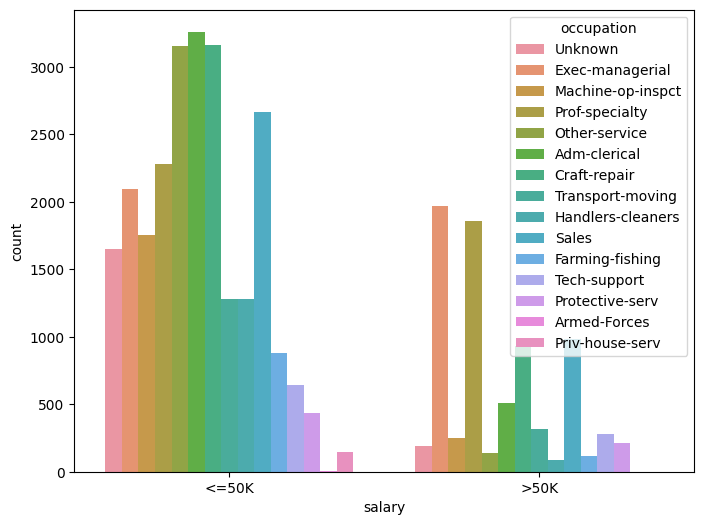

In [424]:
plt.figure(figsize = (8,6))
sns.countplot(data= df, x ='salary' ,hue = 'occupation');

**Check the the percentage distribution of person in each occupation groups by "salary" levels and visualize it with bar plot**

In [425]:
df.groupby('salary').occupation.value_counts()

salary  occupation       
<=50K   Adm-clerical         3261
        Craft-repair         3165
        Other-service        3154
        Sales                2667
        Prof-specialty       2278
        Exec-managerial      2097
        Machine-op-inspct    1751
        Unknown              1652
        Handlers-cleaners    1283
        Transport-moving     1277
        Farming-fishing       877
        Tech-support          644
        Protective-serv       438
        Priv-house-serv       146
        Armed-Forces            8
>50K    Exec-managerial      1968
        Prof-specialty       1858
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     249
        Protective-serv       211
        Unknown               191
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces  

In [426]:
df12 =pd.DataFrame(df.groupby('salary').occupation.value_counts(normalize = True))
df12.rename(columns = {'occupation':'percentage'},inplace = True)
df12.reset_index(inplace = True)
df12.head()

salary      occupation  percentage
0  <=50K    Adm-clerical    0.132035
1  <=50K    Craft-repair    0.128148
2  <=50K   Other-service    0.127703
3  <=50K           Sales    0.107984
4  <=50K  Prof-specialty    0.092234

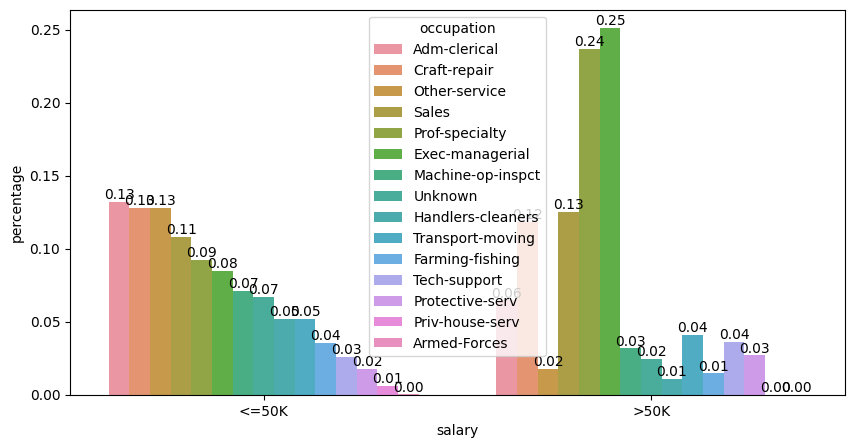

In [427]:
fig, ax =plt.subplots(figsize = (10,5))
ax= sns.barplot(data= df12, x ='salary' ,y = 'percentage',hue = 'occupation');
for i in ax.containers:
    ax.bar_label(i,fmt="%.2f");

**Write down the conclusions you draw from your analysis**

**Result :** "Exec-managerial" and "Prof-specialty" occupations have a high ratio of high-level income both in the self group and in the high-income group.

## race

**Check the count of person in each categories and visualize it with countplot**

In [428]:
df.race.value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

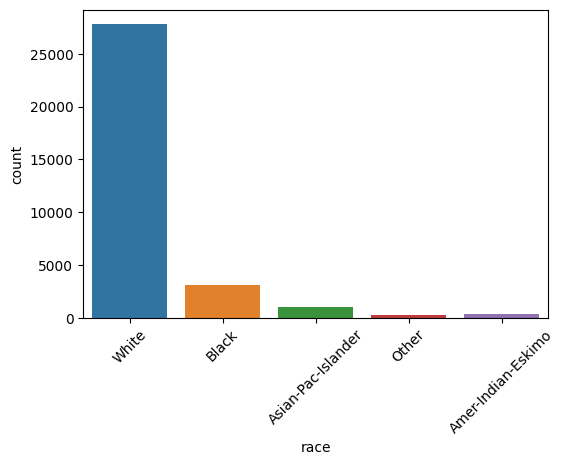

In [429]:
plt.figure(figsize = (6,4))
plt.xticks(rotation=45)
sns.countplot(data= df, x ='race' );

**Check the count of person in each "salary" levels by races and visualize it with countplot**

In [430]:
df.groupby('race').salary.value_counts()

race                salary
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: salary, dtype: int64

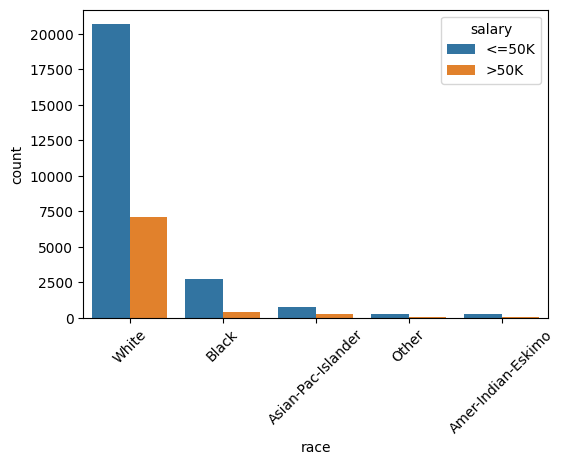

In [431]:
plt.figure(figsize = (6,4))
plt.xticks(rotation=45)
sns.countplot(data= df, x ='race',hue = 'salary' );

**Check the percentage distribution of person in each "salary" levels by each races and visualize it with pie plot**

In [432]:
df.groupby('race').salary.value_counts(normalize = True)

race                salary
Amer-Indian-Eskimo  <=50K     0.884244
                    >50K      0.115756
Asian-Pac-Islander  <=50K     0.734104
                    >50K      0.265896
Black               <=50K     0.876041
                    >50K      0.123959
Other               <=50K     0.907749
                    >50K      0.092251
White               <=50K     0.744019
                    >50K      0.255981
Name: salary, dtype: float64

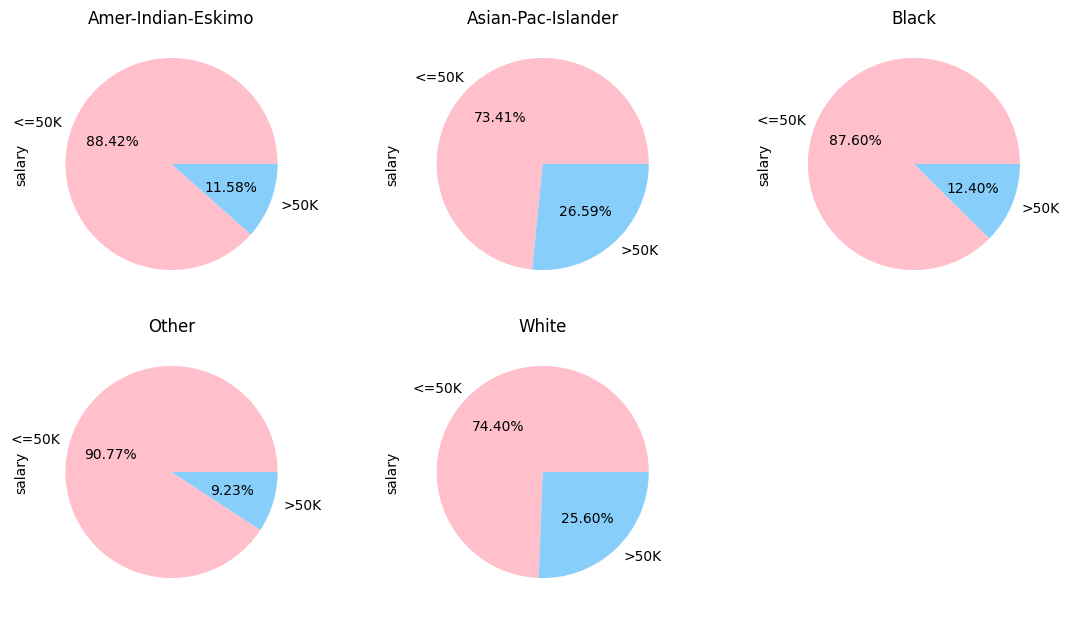

In [433]:
# Your Code is Here
fig, ax = plt.subplots(2,3,figsize = (13,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0)
ax[0,0].pie(x = df[df['race'] == 'Amer-Indian-Eskimo'].salary.value_counts(normalize=True) ,radius = 1, labels = ['<=50K','>50K'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[0,1].pie(x = df[df['race'] == 'Asian-Pac-Islander'].salary.value_counts(normalize=True) ,radius = 1, labels = ['<=50K','>50K'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[0,2].pie(x = df[df['race'] == 'Black'].salary.value_counts(normalize=True) ,radius = 1, labels = ['<=50K','>50K'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[1,0].pie(x = df[df['race'] == 'Other'].salary.value_counts(normalize=True) ,radius = 1, labels = ['<=50K','>50K'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[1,1].pie(x = df[df['race'] == 'White'].salary.value_counts(normalize=True) ,radius = 1, labels = ['<=50K','>50K'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[1,2].axis("off");
ax[0,0].set_title("Amer-Indian-Eskimo")
ax[0,0].set_ylabel("salary")
ax[0,1].set_title("Asian-Pac-Islander")
ax[0,1].set_ylabel("salary")
ax[0,2].set_title("Black")
ax[0,2].set_ylabel("salary")
ax[1,0].set_title("Other")
ax[1,0].set_ylabel("salary")
ax[1,1].set_title("White")
ax[1,1].set_ylabel("salary");

**Check the count of person in each races by "salary" levels and visualize it with countplot**

In [434]:
df.groupby('salary').race.value_counts()

salary  race              
<=50K   White                 20680
        Black                  2735
        Asian-Pac-Islander      762
        Amer-Indian-Eskimo      275
        Other                   246
>50K    White                  7115
        Black                   387
        Asian-Pac-Islander      276
        Amer-Indian-Eskimo       36
        Other                    25
Name: race, dtype: int64

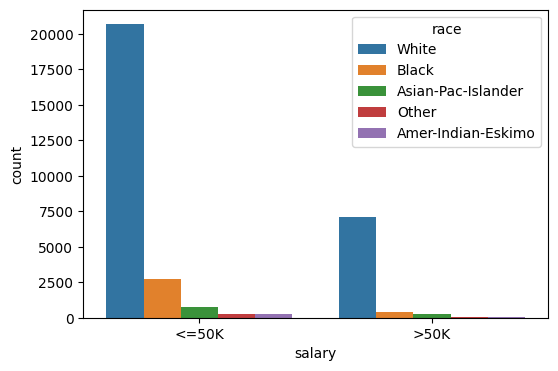

In [435]:
plt.figure(figsize = (6,4))
sns.countplot(data= df, x ='salary',hue = 'race' );

**Check the the percentage distribution of person in each races by "salary" levels and visualize it with bar plot**

In [436]:
df.groupby('salary').race.value_counts(normalize = True)

salary  race              
<=50K   White                 0.837315
        Black                 0.110738
        Asian-Pac-Islander    0.030853
        Amer-Indian-Eskimo    0.011135
        Other                 0.009960
>50K    White                 0.907641
        Black                 0.049369
        Asian-Pac-Islander    0.035209
        Amer-Indian-Eskimo    0.004592
        Other                 0.003189
Name: race, dtype: float64

In [437]:
df13 = pd.DataFrame(df.groupby('salary').race.value_counts(normalize=True))

In [438]:
df13

race
salary race                        
<=50K  White               0.837315
       Black               0.110738
       Asian-Pac-Islander  0.030853
       Amer-Indian-Eskimo  0.011135
       Other               0.009960
>50K   White               0.907641
       Black               0.049369
       Asian-Pac-Islander  0.035209
       Amer-Indian-Eskimo  0.004592
       Other               0.003189

In [439]:
df13.rename(columns = {'race' : 'percentage'},inplace = True)
df13.reset_index(inplace = True)

In [440]:
df13.sort_values(by = 'salary',inplace= True)
df13

salary                race  percentage
0  <=50K               White    0.837315
1  <=50K               Black    0.110738
2  <=50K  Asian-Pac-Islander    0.030853
3  <=50K  Amer-Indian-Eskimo    0.011135
4  <=50K               Other    0.009960
5   >50K               White    0.907641
6   >50K               Black    0.049369
7   >50K  Asian-Pac-Islander    0.035209
8   >50K  Amer-Indian-Eskimo    0.004592
9   >50K               Other    0.003189

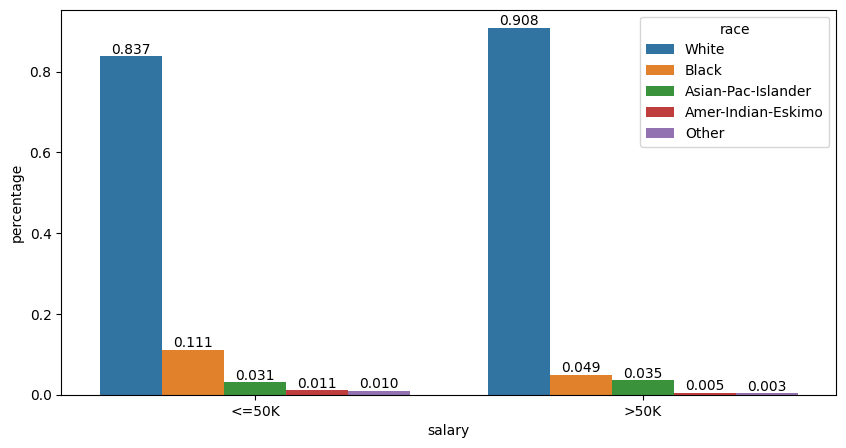

In [441]:
fig, ax =plt.subplots(figsize = (10,5))

ax= sns.barplot(data= df13, x ='salary' ,y = 'percentage',hue = 'race');
for i in ax.containers:
    ax.bar_label(i,fmt="%.3f");

**Write down the conclusions you draw from your analysis**

**Result :** The rate of having a high income level is higher in whites and Asian-Pac-Islanders compared to other races.

## gender

**Check the count of person in each gender and visualize it with countplot**

In [442]:
df.gender.value_counts()

Male      21775
Female    10762
Name: gender, dtype: int64

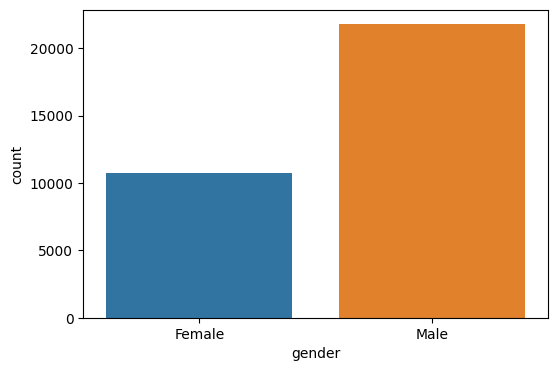

In [443]:
# Your Code is Here
plt.figure(figsize=(6,4))
sns.countplot(data= df, x = 'gender' );

**Check the count of person in each "salary" levels by gender and visualize it with countplot**

In [444]:
df.groupby('gender').salary.value_counts()

gender  salary
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: salary, dtype: int64

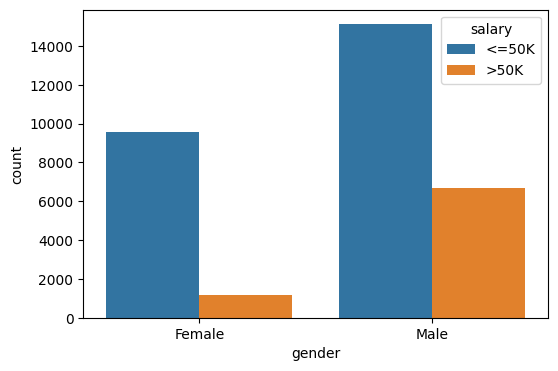

In [445]:
plt.figure(figsize=(6,4))
sns.countplot(data= df, x = 'gender' ,hue = 'salary');

**Check the percentage distribution of person in each "salary" levels by each gender and visualize it with pie plot**

In [446]:
df.groupby('gender').salary.value_counts(normalize=True)

gender  salary
Female  <=50K     0.890448
        >50K      0.109552
Male    <=50K     0.694145
        >50K      0.305855
Name: salary, dtype: float64

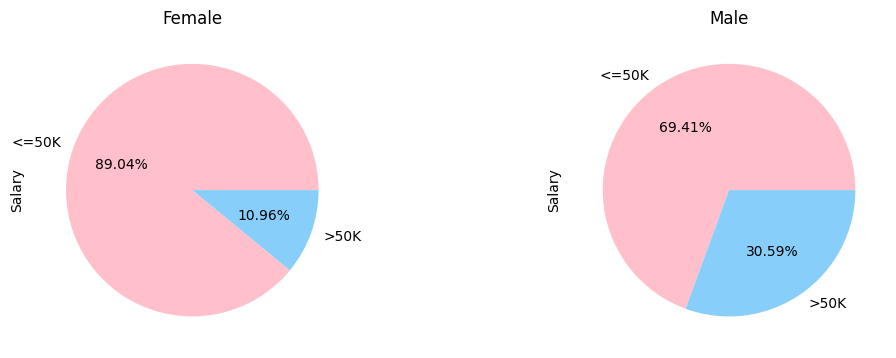

In [447]:
fig, ax = plt.subplots(1,2,figsize = (11,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0)
ax[0].pie(x = df[df['gender'] == 'Female'].salary.value_counts(normalize=True) ,radius = 1, labels = ['<=50K','>50K'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[1].pie(x = df[df['gender'] == 'Male'].salary.value_counts(normalize=True) ,radius = 1, labels = ['<=50K','>50K'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[0].set_title("Female")
ax[0].set_ylabel("Salary")
ax[1].set_title("Male")
ax[1].set_ylabel("Salary");

**Check the count of person in each gender by "salary" levels and visualize it with countplot**

In [448]:
df.groupby('salary').gender.value_counts()

salary  gender
<=50K   Male      15115
        Female     9583
>50K    Male       6660
        Female     1179
Name: gender, dtype: int64

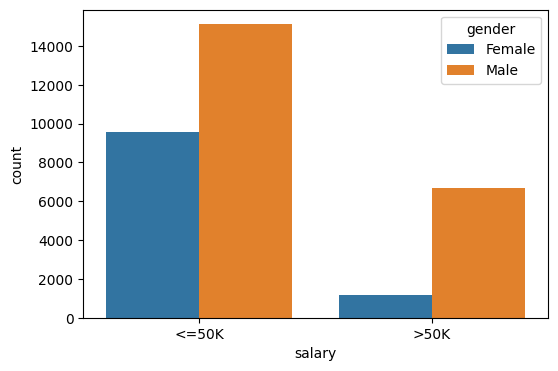

In [449]:
plt.figure(figsize=(6,4))
sns.countplot(data= df, x = 'salary' ,hue = 'gender');

**Check the the percentage distribution of person in each gender by "salary" levels and visualize it with pie plot**

In [450]:
df.groupby('salary').gender.value_counts(normalize= True)

salary  gender
<=50K   Male      0.611993
        Female    0.388007
>50K    Male      0.849598
        Female    0.150402
Name: gender, dtype: float64

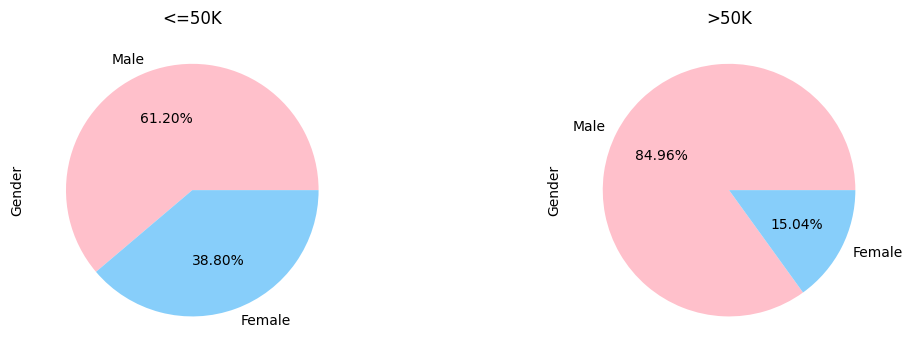

In [451]:
fig, ax = plt.subplots(1,2,figsize = (11,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0)
ax[0].pie(x = df[df['salary'] == '<=50K'].gender.value_counts(normalize=True) ,radius = 1, labels = ['Male','Female'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[1].pie(x = df[df['salary'] == '>50K'].gender.value_counts(normalize=True) ,radius = 1, labels = ['Male','Female'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[0].set_title("<=50K")
ax[0].set_ylabel("Gender")
ax[1].set_title(">50K")
ax[1].set_ylabel("Gender");

**Write down the conclusions you draw from your analysis**

**Result :** When the tables are interpreted, it is seen that the rate of having a high income level is higher for men than for women.

## native_country

**Check the count of person in each categories and visualize it with countplot**

In [452]:
df.native_country.value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

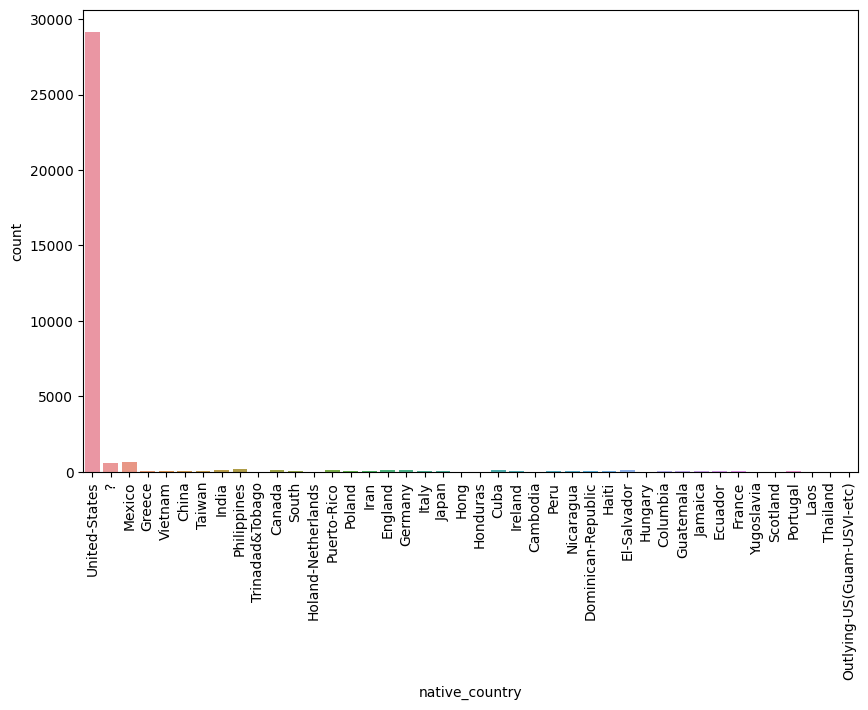

In [453]:
plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
sns.countplot(data = df, x = 'native_country' );

**Replace the value "?" to the value "Unknown"** 

In [454]:
df['native_country'].replace('?', 'Unknown',inplace = True)
df.native_country.value_counts()

United-States                 29153
Mexico                          639
Unknown                         582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

**Decrease the number of categories in "native_country" feature as US, and Others and create a new feature with this new categorical data**

In [455]:
def mapping_native_country(x):
    if x == "United-States":
        return "US"
    else:
        return "Others"

In [456]:
# Your Code is Here

df['native_country'].apply(mapping_native_country).value_counts()

US        29153
Others     3384
Name: native_country, dtype: int64

In [457]:
df["native_country_summary"] = df.native_country.apply(mapping_native_country)
df.native_country_summary

0        US
1        US
2        US
3        US
4        US
         ..
32556    US
32557    US
32558    US
32559    US
32560    US
Name: native_country_summary, Length: 32537, dtype: object

**Visualize the count of person in each new categories (US, Others)**

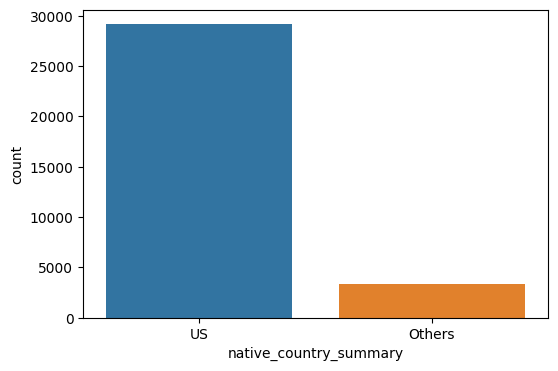

In [458]:
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'native_country_summary' );

**Check the count of person in each "salary" levels by these new native countries (US, Others) and visualize it with countplot**

In [459]:
df.groupby('native_country_summary').salary.value_counts()

native_country_summary  salary
Others                  <=50K      2714
                        >50K        670
US                      <=50K     21984
                        >50K       7169
Name: salary, dtype: int64

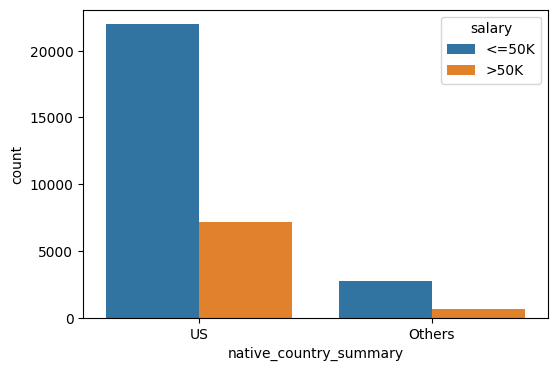

In [460]:
# Your Code is Here
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'native_country_summary' , hue = 'salary');

**Check the percentage distribution of person in each "salary" levels by each new native countries (US, Others) and visualize it with pie plot separately**

In [461]:
df.groupby('native_country_summary').salary.value_counts(normalize = True)

native_country_summary  salary
Others                  <=50K     0.802009
                        >50K      0.197991
US                      <=50K     0.754090
                        >50K      0.245910
Name: salary, dtype: float64

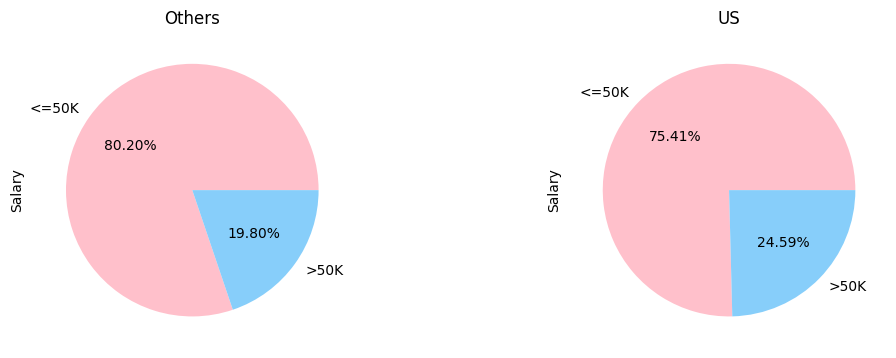

In [462]:
fig, ax = plt.subplots(1,2,figsize = (11,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0)
ax[0].pie(x = df[df['native_country_summary'] == 'Others'].salary.value_counts(normalize=True) ,radius = 1, labels = ['<=50K','>50K'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[1].pie(x = df[df['native_country_summary'] == 'US'].salary.value_counts(normalize=True) ,radius = 1, labels = ['<=50K','>50K'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[0].set_title("Others")
ax[0].set_ylabel("Salary")
ax[1].set_title("US")
ax[1].set_ylabel("Salary");


**Check the count of person in each these new native countries (US, Others) by "salary" levels and visualize it with countplot**

In [463]:
df.groupby('salary').native_country_summary.value_counts()

salary  native_country_summary
<=50K   US                        21984
        Others                     2714
>50K    US                         7169
        Others                      670
Name: native_country_summary, dtype: int64

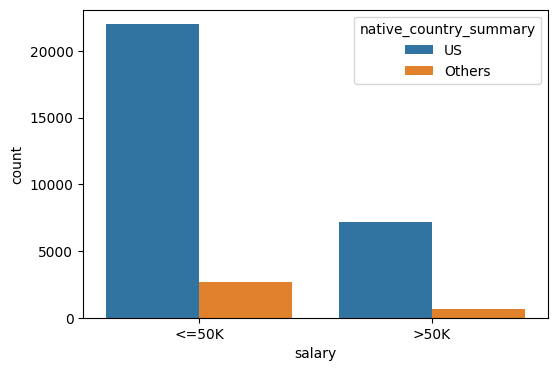

In [464]:
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'salary' , hue = 'native_country_summary' );

**Check the the percentage distribution of person in each these new native countries (US, Others) by "salary" levels and visualize it with pie plot separately**

In [465]:
df.groupby('salary').native_country_summary.value_counts(normalize = True)

salary  native_country_summary
<=50K   US                        0.890113
        Others                    0.109887
>50K    US                        0.914530
        Others                    0.085470
Name: native_country_summary, dtype: float64

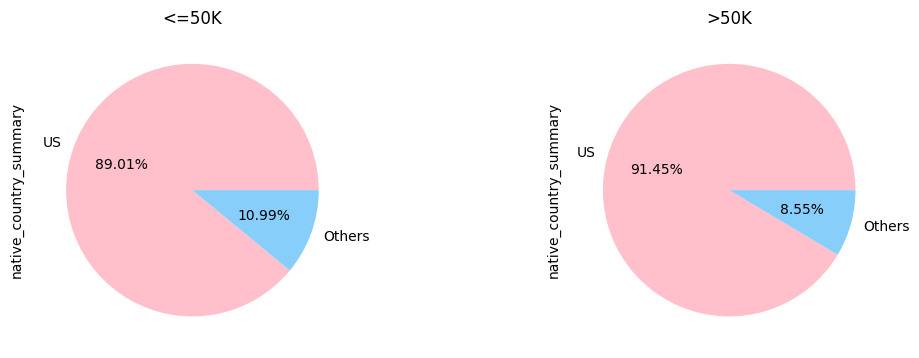

In [466]:
fig, ax = plt.subplots(1,2,figsize = (11,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0)
ax[0].pie(x = df[df['salary'] == '<=50K'].native_country_summary.value_counts(normalize=True) ,radius = 1, labels = ['US','Others'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[1].pie(x = df[df['salary'] == '>50K'].native_country_summary.value_counts(normalize=True) ,radius = 1, labels = ['US','Others'],
        autopct="%.2f%%",colors=["pink","lightskyblue"]);
ax[0].set_title("<=50K")
ax[0].set_ylabel("native_country_summary")
ax[1].set_title(">50K")
ax[1].set_ylabel("native_country_summary");

**Write down the conclusions you draw from your analysis**

**Result :** "United States" has a high ratio of high-level income both in the self group and in the high-income group.

## <p style="background-color:#47AC34; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Other Specific Analysis Questions</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47AC34" data-toggle="popover">Content</a>

### 1. What is the average age of males and females by income level?

In [467]:
df.groupby(['salary','gender'])['age'].mean()

salary  gender
<=50K   Female    36.217468
        Male      37.148726
>50K    Female    42.125530
        Male      44.627177
Name: age, dtype: float64

In [468]:
df14 = pd.DataFrame(df.groupby(['salary','gender'])['age'].mean())

In [469]:
df14

age
salary gender           
<=50K  Female  36.217468
       Male    37.148726
>50K   Female  42.125530
       Male    44.627177

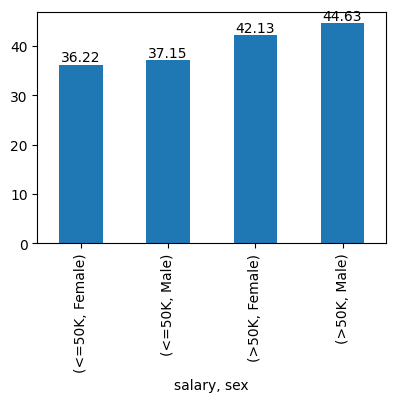

In [470]:
ax= df14.plot(kind="bar",
            legend=False,
            xlabel="salary, sex")
ax.bar_label(ax.containers[0], fmt="%.2f");


In [471]:
df14.reset_index(level=[0,1],inplace=True)

In [472]:
df14

salary  gender        age
0  <=50K  Female  36.217468
1  <=50K    Male  37.148726
2   >50K  Female  42.125530
3   >50K    Male  44.627177

<AxesSubplot: xlabel='salary', ylabel='age'>

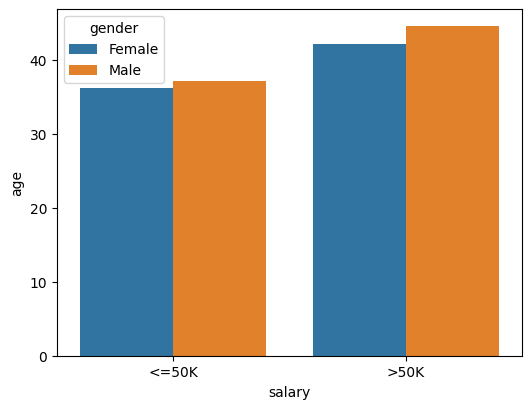

In [473]:
plt.figure(figsize = (6,4.5))
sns.barplot(data = df14 , x = 'salary' , y = 'age', hue = 'gender')

### 2. What is the workclass percentages of Americans in high-level income group?

In [474]:
upper_50_american = df.loc[(df.native_country == 'United-States') & (df.salary == ">50K")] 

In [475]:
upper_50_american_perc =upper_50_american.workclass.value_counts(normalize = True)*100

In [476]:
upper_50_american_perc

Private             63.314270
Self-emp-not-inc     9.192356
Local-gov            8.020644
Self-emp-inc         7.783512
Federal-gov          4.686846
State-gov            4.547357
Unknown              2.455015
Name: workclass, dtype: float64

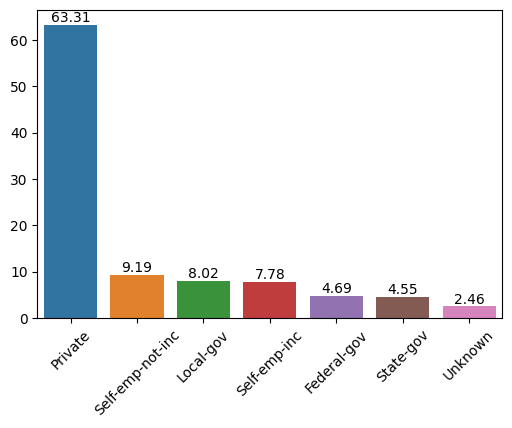

In [477]:
fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(x=upper_50_american_perc.index, y=upper_50_american_perc.values)

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f")
ax.set_xticklabels(upper_50_american_perc.index,rotation=45);


### 3. What is the occupation percentages of Americans who work as "Private" workclass in high-level income group?

In [478]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary', 'education_summary', 'marital_status_summary',
       'native_country_summary'],
      dtype='object')

In [479]:
df.loc[(df.workclass == 'Private') & (df.salary == ">50K")].occupation.value_counts(normalize = True)*100

Exec-managerial      26.103608
Prof-specialty       20.298327
Craft-repair         14.533360
Sales                13.787543
Adm-clerical          6.470470
Transport-moving      5.119935
Machine-op-inspct     4.515219
Tech-support          4.454747
Other-service         2.015723
Handlers-cleaners     1.471478
Farming-fishing       0.604717
Protective-serv       0.604717
Priv-house-serv       0.020157
Name: occupation, dtype: float64

In [480]:
upper_50_private_perc = df.loc[(df.workclass == 'Private') & (df.salary == ">50K")].occupation.value_counts(normalize = True)*100

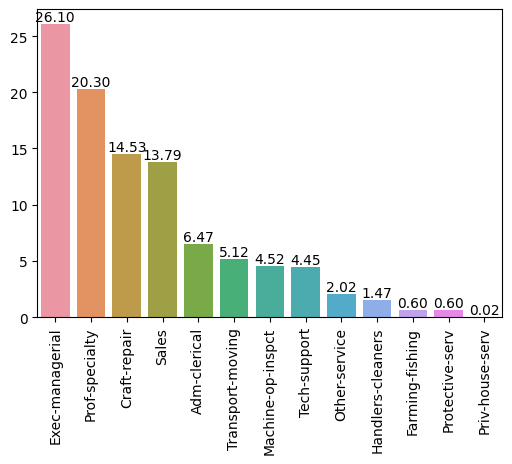

In [481]:
fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(x=upper_50_private_perc.index, y=upper_50_private_perc.values)

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f")
ax.set_xticklabels(upper_50_private_perc.index,rotation=90);

### 4. What is the education level percentages of Asian-Pac-Islander race group in high-level income group?

In [482]:
df.loc[(df.race == 'Asian-Pac-Islander') & (df.salary == ">50K")].education.value_counts(normalize = True)*100

Bachelors       35.144928
Masters         15.579710
HS-grad         12.318841
Some-college    11.956522
Prof-school      9.782609
Doctorate        6.521739
Assoc-voc        3.260870
Assoc-acdm       2.898551
5th-6th          1.086957
11th             0.362319
9th              0.362319
10th             0.362319
12th             0.362319
Name: education, dtype: float64

In [483]:
upper_50_asian_edu_perc=df.loc[(df.race == 'Asian-Pac-Islander') & (df.salary == ">50K")].education.value_counts(normalize = True)*100

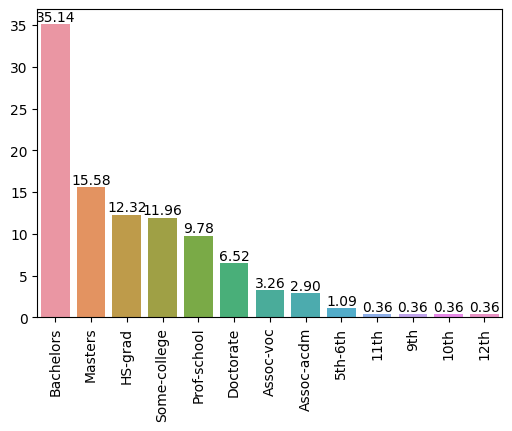

In [484]:
fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(x=upper_50_asian_edu_perc.index, y=upper_50_asian_edu_perc.values)

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f")
ax.set_xticklabels(upper_50_asian_edu_perc.index,rotation=90);


### 5. What is the occupation percentages of Asian-Pac-Islander race group who has a Bachelors degree in high-level income group?

In [485]:
upper_50_asian_bach = df.loc[(df.race == 'Asian-Pac-Islander') & (df.salary == ">50K")& (df.education == 'Bachelors')]

In [486]:
upper_50_asian_bach.occupation.value_counts(normalize = True)*100

Exec-managerial      27.835052
Prof-specialty       25.773196
Adm-clerical         12.371134
Sales                 9.278351
Other-service         9.278351
Craft-repair          7.216495
Tech-support          3.092784
Protective-serv       2.061856
Machine-op-inspct     1.030928
Farming-fishing       1.030928
Transport-moving      1.030928
Name: occupation, dtype: float64

In [487]:
upper_50_asian_bach_perc = upper_50_asian_bach.occupation.value_counts(normalize = True)*100

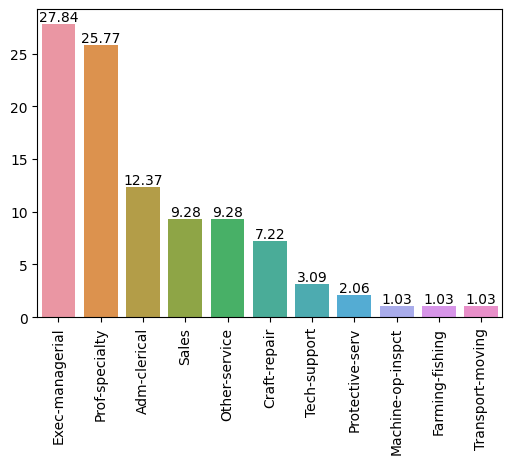

In [488]:
fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(x=upper_50_asian_bach_perc.index, y=upper_50_asian_bach_perc.values)

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f")
ax.set_xticklabels(upper_50_asian_bach_perc.index,rotation=90);


### 6. What is the mean of working hours per week by gender for education level, workclass and marital status? Try to plot all required in one figure.

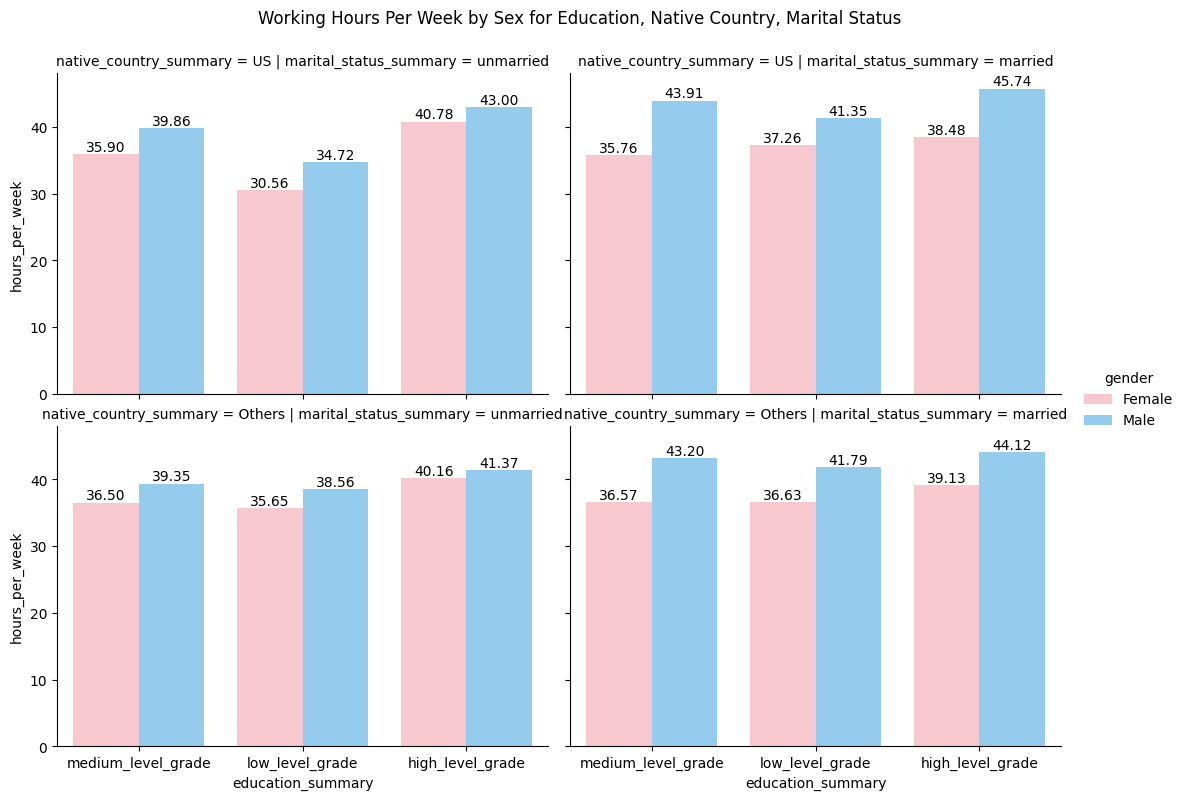

In [489]:
g = sns.catplot(x="education_summary",
            y="hours_per_week",
            data=df,
            kind="bar",
            hue="gender",
            ci= None,
            col="marital_status_summary",
            row="native_country_summary",
            palette= ["pink","lightskyblue"],
            
               );
g.fig.set_size_inches(12, 8)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Working Hours Per Week by Sex for Education, Native Country, Marital Status ')

ax1 = g.facet_axis(0,0)
ax2 = g.facet_axis(0,1)
ax3 = g.facet_axis(1,0)
ax4 = g.facet_axis(1,1)


for i in ax1.containers:
         ax1.bar_label(i,fmt="%.2f")
for i in ax2.containers:
         ax2.bar_label(i,fmt="%.2f")
for i in ax3.containers:
         ax3.bar_label(i,fmt="%.2f")        
for i in ax4.containers:
         ax4.bar_label(i,fmt="%.2f")     

## <p style="background-color:#47AC34; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dropping Similar & Unneccessary Features</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47AC34" data-toggle="popover">Content</a>

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_num           32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   gender                  32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  hours_per_week          32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  object
 15  ed

In [491]:
df.drop(columns=["education","education_num",
                 "relationship","marital_status",
                 "native_country"],inplace=True)

In [492]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'occupation', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'salary',
       'education_summary', 'marital_status_summary',
       'native_country_summary'],
      dtype='object')

## <p style="background-color:#47AC34; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Missing Value</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47AC34" data-toggle="popover">Content</a>

**Check the missing values for all features basically**

In [493]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

**1. It seems that there is no missing value. But we know that "workclass", and "occupation" features have missing values as the "Unknown" string values. Examine these features in more detail.**

**2. Decide if drop these "Unknown" string values or not**

In [494]:
df.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [495]:
df.occupation.value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [496]:
df.loc[(df.workclass=="Unknown")|(df.workclass== "Never-worked")]["workclass"].value_counts()

Unknown         1836
Never-worked       7
Name: workclass, dtype: int64

In [497]:
df.replace(to_replace="Unknown",value=np.nan,inplace=True)

In [498]:
df.isnull().sum()

age                          0
workclass                 1836
fnlwgt                       0
occupation                1843
race                         0
gender                       0
capital_gain                 0
capital_loss                 0
hours_per_week               0
salary                       0
education_summary            0
marital_status_summary       0
native_country_summary       0
dtype: int64

In [499]:
df.dropna(inplace = True)
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30694 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30694 non-null  int64 
 1   workclass               30694 non-null  object
 2   fnlwgt                  30694 non-null  int64 
 3   occupation              30694 non-null  object
 4   race                    30694 non-null  object
 5   gender                  30694 non-null  object
 6   capital_gain            30694 non-null  int64 
 7   capital_loss            30694 non-null  int64 
 8   hours_per_week          30694 non-null  int64 
 9   salary                  30694 non-null  object
 10  education_summary       30694 non-null  object
 11  marital_status_summary  30694 non-null  object
 12  native_country_summary  30694 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.3+ MB


## <p style="background-color:#47AC34; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47AC34" data-toggle="popover">Content</a>

### Boxplot and Histplot for all numeric features

**Plot boxplots for each numeric features at the same figure as subplots**

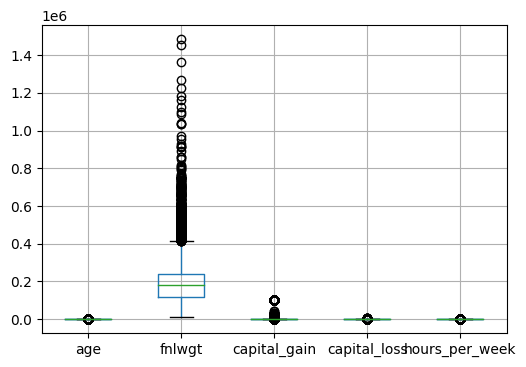

In [501]:
# Your Code is Here
plt.figure(figsize = (6,4))
df.boxplot();

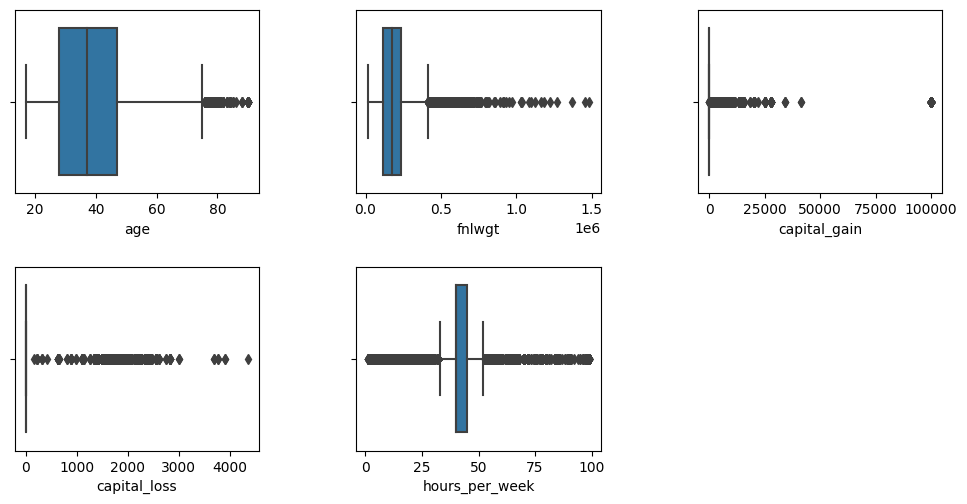

In [502]:
# Your Code is Here
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(10,5))
fig.tight_layout()
sns.boxplot(ax=ax[0, 0], data=df, x='age')
sns.boxplot(ax=ax[0, 1], data=df, x='fnlwgt')
sns.boxplot(ax=ax[0, 2], data=df, x='capital_gain')
sns.boxplot(ax=ax[1, 0], data=df, x='capital_loss')
sns.boxplot(ax=ax[1, 1], data=df, x='hours_per_week')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
ax[1,2].axis("off");


**Plot both boxplots and histograms for each numeric features at the same figure as subplots**

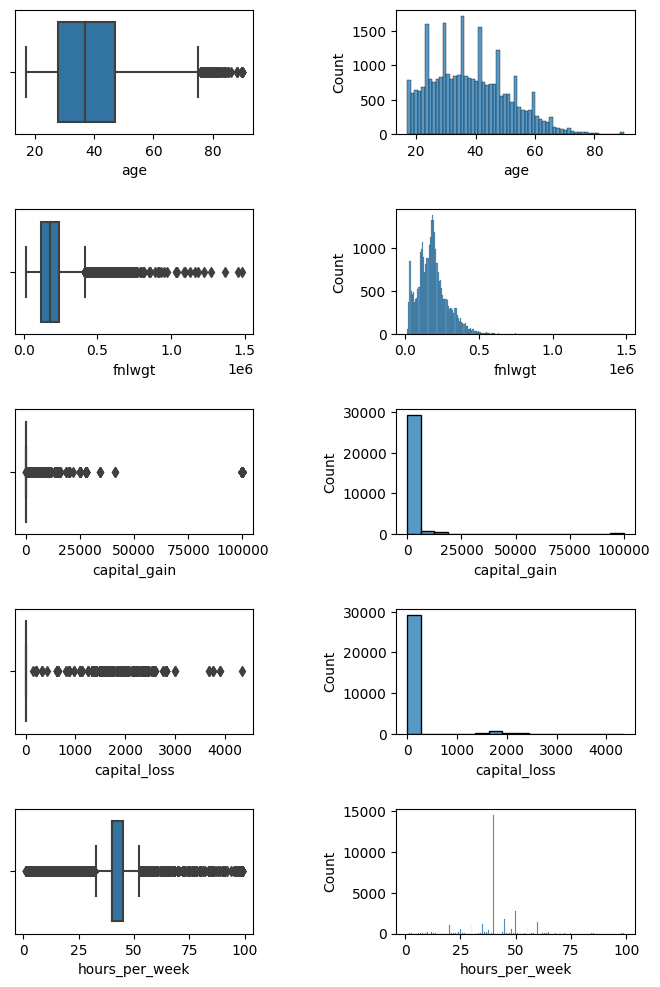

In [503]:
# Your Code is Here
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(8,12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=0.6)
sns.boxplot(ax=ax[0, 0], data=df, x='age')
sns.histplot(ax=ax[0, 1], data=df, x='age')
sns.boxplot(ax=ax[1, 0], data=df, x='fnlwgt')
sns.histplot(ax=ax[1, 1], data=df, x='fnlwgt')
sns.boxplot(ax=ax[2, 0], data=df, x='capital_gain')
sns.histplot(ax=ax[2, 1], data=df, x='capital_gain')
sns.boxplot(ax=ax[3, 0], data=df, x='capital_loss')
sns.histplot(ax=ax[3, 1], data=df, x='capital_loss')
sns.boxplot(ax=ax[4, 0], data=df, x='hours_per_week')
sns.histplot(ax=ax[4, 1], data=df, x='hours_per_week');

**Check the statistical values for all numeric features**

In [504]:
df.describe().T

count           mean            std      min       25%  \
age             30694.0      38.447612      13.115154     17.0      28.0   
fnlwgt          30694.0  189848.229100  105465.126262  13769.0  117828.5   
capital_gain    30694.0    1106.901903    7500.730406      0.0       0.0   
capital_loss    30694.0      88.979735     405.808149      0.0       0.0   
hours_per_week  30694.0      40.952759      11.984367      1.0      40.0   

                     50%        75%        max  
age                 37.0      47.00       90.0  
fnlwgt          178513.5  237293.75  1484705.0  
capital_gain         0.0       0.00    99999.0  
capital_loss         0.0       0.00     4356.0  
hours_per_week      40.0      45.00       99.0

**1. After analyzing all features, we have decided that we can't evaluate extreme values in "fnlwgt, capital_gain, capital_loss" features in the scope of outliers.**

**2. So let's examine "age and hours_per_week" features and detect extreme values which could be outliers by using IQR Rule.**

### age

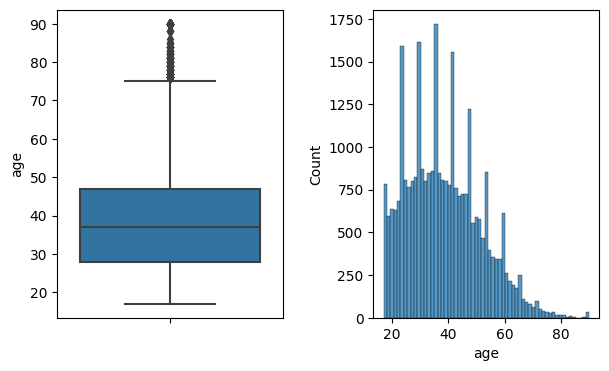

In [505]:
fig,ax = plt.subplots(ncols=2,figsize=(7,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4)
sns.boxplot(ax=ax[0], data=df, y='age')
sns.histplot(ax=ax[1], data=df, x='age');

In [506]:
Q1 = df.age.quantile(0.25)
Q3 =df.age.quantile(0.75)
IQR = Q3-Q1
Q1,Q3,IQR


(28.0, 47.0, 19.0)

In [507]:
lower_lim_age= Q1 - 1.5*IQR
upper_lim_age= Q3 + 1.5*IQR

lower_lim_age,upper_lim_age


(-0.5, 75.5)

In [508]:
df.age.value_counts().tail(14)

90    35
75    34
76    30
77    20
80    16
79    15
81    14
78    14
84     8
82     7
83     5
88     3
85     3
86     1
Name: age, dtype: int64

In [509]:
df.loc[(df.age >= upper_lim_age)].sort_values(by=["age"],ascending=False)

age         workclass  fnlwgt       occupation   race  gender  \
14659   90           Private   40388  Exec-managerial  White    Male   
15505   90           Private  250832  Exec-managerial  White    Male   
20265   90           Private  313749   Prof-specialty  White  Female   
20149   90           Private  311184            Sales  White    Male   
3776    90  Self-emp-not-inc   82628  Exec-managerial  White    Male   
...    ...               ...     ...              ...    ...     ...   
20842   76           Private  125784  Exec-managerial  White    Male   
24725   76           Private  142535     Adm-clerical  White    Male   
8560    76           Private  199949  Protective-serv  White    Male   
23999   76         Local-gov  178665    Other-service  White    Male   
21941   76  Self-emp-not-inc  236878     Craft-repair  White    Male   

       capital_gain  capital_loss  hours_per_week salary   education_summary  \
14659             0             0              55  <=50K    high_level_grade   
15505             0             0              40  <=50K     low_level_grade   
20265             0             0              10  <=50K    high_level_grade   
20149             0             0              20  <=50K    high_level_grade   
3776           2964             0              12  <=50K  medium_level_grade   
...             ...           ...             ...    ...                 ...   
20842             0             0              40  <=50K    high_level_grade   
24725             0             0               6  <=50K  medium_level_grade   
8560              0             0              13  <=50K     low_level_grade   
23999             0             0              30  <=50K     low_level_grade   
21941             0             0              30  <=50K  medium_level_grade   

      marital_status_summary native_country_summary  
14659              unmarried                     US  
15505                married                     US  
20265              unmarried                     US  
20149                married                 Others  
3776               unmarried                     US  
...                      ...                    ...  
20842                married                     US  
24725              unmarried                     US  
8560                 married                     US  
23999                married                     US  
21941                married                     US  

[171 rows x 13 columns]

### hours_per_week

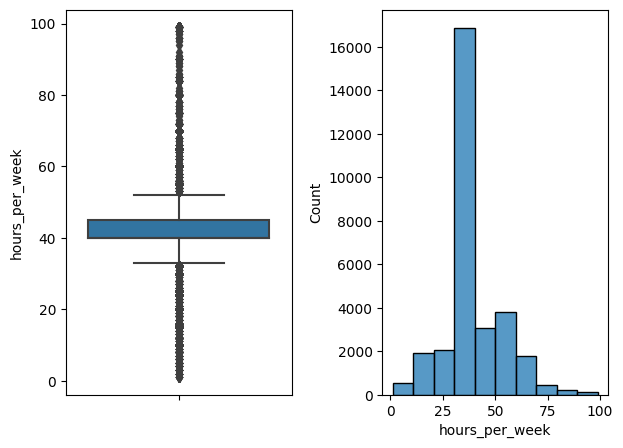

In [510]:
fig,ax = plt.subplots(ncols=2,figsize=(7,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4)
sns.boxplot(ax=ax[0], data=df, y='hours_per_week')
sns.histplot(ax=ax[1], data=df, x='hours_per_week',bins=10);


In [511]:
Q1 = df.hours_per_week.quantile(0.25)
Q3 =df.hours_per_week.quantile(0.75)
IQR = Q3-Q1
Q1,Q3,IQR

(40.0, 45.0, 5.0)

In [512]:
lower_lim_hours_per_week= Q1 - 1.5*IQR
upper_lim_hours_per_week= Q3 + 1.5*IQR
lower_lim_hours_per_week,upper_lim_hours_per_week

(32.5, 52.5)

In [513]:
(df.loc[(df.hours_per_week >= upper_lim_hours_per_week)].hours_per_week.value_counts()).sort_index(ascending=False)

99      80
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      28
89       2
88       2
87       1
86       2
85      13
84      41
82       1
81       3
80     124
78       8
77       6
76       3
75      63
74       1
73       2
72      68
70     284
68      12
67       4
66      17
65     242
64      14
63      10
62      18
61       2
60    1441
59       5
58      27
57      17
56      91
55     683
54      39
53      23
Name: hours_per_week, dtype: int64

In [514]:
df.loc[(df.hours_per_week >= upper_lim_hours_per_week)].sort_values(by=["hours_per_week"],ascending=False)


age         workclass  fnlwgt        occupation   race  gender  \
28435   30           Private   39386   Exec-managerial  Black    Male   
30993   42  Self-emp-not-inc   39539   Farming-fishing  White    Male   
409     38           Private  111499             Sales  White    Male   
21675   61      Self-emp-inc  102191   Exec-managerial  White  Female   
2971    73  Self-emp-not-inc  102510   Farming-fishing  White    Male   
...    ...               ...     ...               ...    ...     ...   
2505    43           Private  258049   Exec-managerial  White    Male   
5217    27           Private  138705      Craft-repair  White    Male   
3579    48           Private  348144  Transport-moving  White    Male   
26398   19  Self-emp-not-inc  137578     Other-service  White    Male   
29345   62           Private  123411  Transport-moving  White    Male   

       capital_gain  capital_loss  hours_per_week salary   education_summary  \
28435             0             0              99  <=50K  medium_level_grade   
30993             0             0              99   >50K  medium_level_grade   
409               0          1977              99   >50K  medium_level_grade   
21675             0             0              99  <=50K    high_level_grade   
2971           6418             0              99   >50K     low_level_grade   
...             ...           ...             ...    ...                 ...   
2505           7688             0              53   >50K    high_level_grade   
5217              0             0              53  <=50K  medium_level_grade   
3579           3325             0              53  <=50K  medium_level_grade   
26398             0             0              53  <=50K  medium_level_grade   
29345             0             0              53  <=50K     low_level_grade   

      marital_status_summary native_country_summary  
28435                married                     US  
30993                married                     US  
409                  married                     US  
21675              unmarried                     US  
2971                 married                     US  
...                      ...                    ...  
2505                 married                     US  
5217                 married                     US  
3579               unmarried                     US  
26398              unmarried                     US  
29345                married                     US  

[3402 rows x 13 columns]

In [515]:
(df.loc[(df.hours_per_week < lower_lim_hours_per_week)].hours_per_week.value_counts()).sort_index(ascending=True)

1        8
2       15
3       24
4       28
5       39
6       40
7       20
8      103
9       17
10     223
11       9
12     143
13      19
14      28
15     350
16     182
17      27
18      64
19      14
20    1066
21      23
22      39
23      20
24     220
25     582
26      30
27      28
28      74
29       6
30    1009
31       5
32     239
Name: hours_per_week, dtype: int64

In [516]:
df.loc[(df.hours_per_week < lower_lim_hours_per_week)].groupby("salary")["hours_per_week"].describe()

count      mean      std  min   25%   50%   75%   max
salary                                                        
<=50K   4372.0  21.54849  7.34250  1.0  16.0  20.0  30.0  32.0
>50K     322.0  22.02795  7.81339  1.0  18.0  24.0  30.0  32.0

In [517]:
df.loc[(df.hours_per_week < lower_lim_hours_per_week) ].groupby("salary")["age"].describe()

count       mean        std   min   25%   50%   75%   max
salary                                                            
<=50K   4372.0  34.052150  17.729804  17.0  20.0  26.0  45.0  90.0
>50K     322.0  49.484472  13.894397  22.0  39.0  48.0  60.0  90.0

**Result :** As we see, there are number of extreme values in both "age and hours_per_week" features. But how can we know if these extreme values are outliers or not? At this point, **domain knowledge** comes to the fore.

**Domain Knowledge for this dataset:**
1. In this dataset, all values are created according to the statements of individuals. So It can be some "data entries errors".
2. In addition, we have aimed to create an ML model with some restrictions as getting better performance from the ML model.
3. In this respect, our sample space ranges for some features are as follows.
    - **age : 17 to 80**
    - **hours_per_week : 7 to 70**
    - **if somebody's age is more than 60, he/she can't work more than 60 hours in a week**

### Dropping rows according to the domain knownledge 

In [518]:
age_17_to_80 =df.loc[(df.age > 80)| (df.age < 17)].sort_values("age",ascending=False)
age_17_to_80


age         workclass  fnlwgt         occupation   race  gender  \
14659   90           Private   40388    Exec-managerial  White    Male   
21192   90           Private   84553  Machine-op-inspct  White    Male   
6724    90           Private  171956       Adm-clerical  White  Female   
7756    90           Private  313986  Handlers-cleaners  White    Male   
22166   90           Private  206667     Prof-specialty  White  Female   
...    ...               ...     ...                ...    ...     ...   
25613   81           Private   98116              Sales  White    Male   
3782    81      Self-emp-inc  247232    Exec-managerial  White  Female   
4067    81           Private  114670    Priv-house-serv  Black  Female   
5028    81  Self-emp-not-inc  136063    Exec-managerial  White    Male   
15789   81           Private  100675     Prof-specialty  White    Male   

       capital_gain  capital_loss  hours_per_week salary   education_summary  \
14659             0             0              55  <=50K    high_level_grade   
21192             0             0              40  <=50K  medium_level_grade   
6724              0             0              40  <=50K  medium_level_grade   
7756              0             0              40  <=50K     low_level_grade   
22166             0             0              40   >50K    high_level_grade   
...             ...           ...             ...    ...                 ...   
25613             0             0              50   >50K    high_level_grade   
3782           2936             0              28  <=50K     low_level_grade   
4067           2062             0               5  <=50K     low_level_grade   
5028              0             0              30  <=50K  medium_level_grade   
15789             0             0              15  <=50K     low_level_grade   

      marital_status_summary native_country_summary  
14659              unmarried                     US  
21192                married                     US  
6724               unmarried                 Others  
7756               unmarried                     US  
22166                married                     US  
...                      ...                    ...  
25613              unmarried                     US  
3782                 married                     US  
4067               unmarried                     US  
5028                 married                     US  
15789                married                 Others  

[76 rows x 13 columns]

In [519]:

age_17_to_80.shape

(76, 13)

In [520]:
age_17_to_80.index


Int64Index([14659, 21192,  6724,  7756, 22166,  8791,  8914,  9984, 21420,
            20956,  5896, 20621, 20265, 20149, 13123, 18067, 14242, 17603,
            15505,  6227,  2299,  5134, 32305,   199, 31218,  1739,  1742,
            28999,  2241,  2296, 16552,  2947,  3776,  3854, 23590, 24183,
            23242,  5242, 25169, 22040, 32468, 11520,  9635, 14001, 27498,
            10940, 28421, 12465, 17874, 17040, 18421,  1761,   118, 20919,
            10734, 23814, 31939, 25376,     1, 11563, 16139, 22008,  8413,
              128, 15379,  1180, 29992, 29420, 10089, 20806,  7291, 25613,
             3782,  4067,  5028, 15789],
           dtype='int64')

In [521]:
df.drop(age_17_to_80.index,inplace=True)

In [522]:
df.age.value_counts()

36    875
31    869
34    860
37    849
33    849
     ... 
76     30
77     20
80     16
79     15
78     14
Name: age, Length: 64, dtype: int64

In [523]:
hpw_7_to_70=df.loc[(df.hours_per_week > 70)  | (df.hours_per_week < 7)].sort_values(by="hours_per_week",ascending=False)
hpw_7_to_70 

age         workclass  fnlwgt         occupation                race  \
29632   31           Private  178370      Other-service               White   
27081   36  Self-emp-not-inc  257250    Farming-fishing               White   
3346    43         Local-gov  118853       Tech-support               White   
5853    55  Self-emp-not-inc  184425    Farming-fishing               White   
3275    49           Private  173115    Exec-managerial               Black   
...    ...               ...     ...                ...                 ...   
4129    66      Self-emp-inc  150726    Exec-managerial               White   
534     77  Self-emp-not-inc   71676       Adm-clerical               White   
26067   74           Private  260669      Other-service               White   
21422   23           Private   72887       Craft-repair  Asian-Pac-Islander   
14186   27           Private  147951  Machine-op-inspct               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
29632  Female             0             0              99   >50K   
27081    Male             0             0              99  <=50K   
3346     Male          4386             0              99   >50K   
5853     Male             0             0              99   >50K   
3275     Male          4416             0              99  <=50K   
...       ...           ...           ...             ...    ...   
4129     Male          1409             0               1  <=50K   
534    Female             0          1944               1  <=50K   
26067  Female             0             0               1  <=50K   
21422    Male             0             0               1  <=50K   
14186    Male             0             0               1  <=50K   

        education_summary marital_status_summary native_country_summary  
29632  medium_level_grade              unmarried                     US  
27081  medium_level_grade                married                     US  
3346   medium_level_grade                married                     US  
5853   medium_level_grade                married                     US  
3275      low_level_grade              unmarried                     US  
...                   ...                    ...                    ...  
4129      low_level_grade                married                 Others  
534    medium_level_grade              unmarried                     US  
26067     low_level_grade              unmarried                     US  
21422  medium_level_grade              unmarried                 Others  
14186  medium_level_grade              unmarried                     US  

[621 rows x 13 columns]

In [524]:
hpw_7_to_70.shape

(621, 13)

In [525]:
hpw_7_to_70.index

Int64Index([29632, 27081,  3346,  5853,  3275, 27418, 30120, 20430, 27381,
            11253,
            ...
            30510, 30338, 25380, 24243,  4396,  4129,   534, 26067, 21422,
            14186],
           dtype='int64', length=621)

In [526]:
df.drop(hpw_7_to_70.index,inplace=True)

In [527]:
df.hours_per_week.value_counts()

40    14490
50     2754
45     1788
60     1439
35     1199
      ...  
29        6
31        5
59        5
67        4
61        2
Name: hours_per_week, Length: 63, dtype: int64

In [528]:
ageupper60_hpwupper60=df.loc[(df.age > 60)&(df.hours_per_week > 60)]
ageupper60_hpwupper60

age         workclass  fnlwgt        occupation                race  \
141     65      Self-emp-inc   81413   Farming-fishing               White   
986     67           Private  197816             Sales               White   
1195    62           Private  162245    Prof-specialty               White   
1664    65      Self-emp-inc  210381   Exec-managerial               White   
3852    70  Self-emp-not-inc  139889   Farming-fishing               White   
6089    75           Private  101887   Priv-house-serv               White   
6117    63      Self-emp-inc   54052             Sales               White   
6530    70           Private   94692             Sales               White   
10160   68           Private  284763  Transport-moving               White   
11248   61  Self-emp-not-inc  133969             Sales  Asian-Pac-Islander   
12622   62  Self-emp-not-inc   26911     Other-service               White   
15197   63      Self-emp-inc  110890    Prof-specialty               White   
18717   62  Self-emp-not-inc  115176   Farming-fishing               White   
21275   64  Self-emp-not-inc  192695   Farming-fishing               White   
21754   62           Private  252668    Prof-specialty               White   
24623   63  Self-emp-not-inc   28612             Sales               White   
24788   64           Private  212838             Sales               White   
25918   61           Private  191417   Exec-managerial               Black   
26773   66      Self-emp-inc  179951   Exec-managerial               White   
27407   67  Self-emp-not-inc  152102   Farming-fishing               White   
28355   61         Local-gov   28375    Prof-specialty               White   
31485   62  Self-emp-not-inc  173631   Exec-managerial               White   
32235   64         State-gov  104361      Adm-clerical               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
141      Male             0          2352              65  <=50K   
986      Male             0          1844              70  <=50K   
1195     Male             0          1628              70  <=50K   
1664     Male         99999             0              65   >50K   
3852     Male          2653             0              70  <=50K   
6089   Female             0             0              70  <=50K   
6117     Male             0             0              68   >50K   
6530     Male             0             0              70   >50K   
10160    Male             0             0              70  <=50K   
11248    Male             0             0              63  <=50K   
12622  Female             0             0              66  <=50K   
15197    Male             0             0              70   >50K   
18717    Male             0             0              65  <=50K   
21275    Male             0             0              70  <=50K   
21754    Male             0             0              70  <=50K   
24623    Male             0             0              70  <=50K   
24788    Male             0             0              65   >50K   
25918    Male             0             0              65  <=50K   
26773    Male             0             0              70  <=50K   
27407    Male             0             0              65  <=50K   
28355  Female             0             0              70  <=50K   
31485    Male             0             0              70  <=50K   
32235  Female             0             0              65  <=50K   

        education_summary marital_status_summary native_country_summary  
141    medium_level_grade                married                     US  
986    medium_level_grade                married                     US  
1195     high_level_grade                married                     US  
1664     high_level_grade                married                     US  
3852   medium_level_grade                married                     US  
6089      low_level_grade              unmarried         

In [529]:
ageupper60_hpwupper60.shape

(23, 13)

In [530]:
ageupper60_hpwupper60.index

Int64Index([  141,   986,  1195,  1664,  3852,  6089,  6117,  6530, 10160,
            11248, 12622, 15197, 18717, 21275, 21754, 24623, 24788, 25918,
            26773, 27407, 28355, 31485, 32235],
           dtype='int64')

In [531]:
df.drop(ageupper60_hpwupper60.index,inplace=True)

In [532]:
df.shape

(29974, 13)

In [533]:
df.head()

age  workclass  fnlwgt         occupation   race  gender  capital_gain  \
3   54    Private  140359  Machine-op-inspct  White  Female             0   
4   41    Private  264663     Prof-specialty  White  Female             0   
5   34    Private  216864      Other-service  White  Female             0   
6   38    Private  150601       Adm-clerical  White    Male             0   
7   74  State-gov   88638     Prof-specialty  White  Female             0   

   capital_loss  hours_per_week salary   education_summary  \
3          3900              40  <=50K     low_level_grade   
4          3900              40  <=50K  medium_level_grade   
5          3770              45  <=50K  medium_level_grade   
6          3770              40  <=50K     low_level_grade   
7          3683              20   >50K    high_level_grade   

  marital_status_summary native_country_summary  
3              unmarried                     US  
4              unmarried                     US  
5              unmarried                     US  
6              unmarried                     US  
7              unmarried                     US

## <p style="background-color:#47AC34; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Final Step to Make the Dataset Ready for ML Models</p>

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:FFF9ED; background-color:#47AC34" data-toggle="popover">Content</a>

### 1. Convert all features to numeric

**Convert target feature (salary) to numeric (0 and 1) by using map function**

In [534]:
df.salary= df.salary.map({"<=50K":0,">50K":1})
df.salary

3        0
4        0
5        0
6        0
7        1
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: salary, Length: 29974, dtype: int64

In [535]:
df.salary.value_counts()

0    22524
1     7450
Name: salary, dtype: int64

**Convert all features to numeric by using get_dummies function**

In [536]:
pd.get_dummies(df,drop_first=True)

age  fnlwgt  capital_gain  capital_loss  hours_per_week  salary  \
3       54  140359             0          3900              40       0   
4       41  264663             0          3900              40       0   
5       34  216864             0          3770              45       0   
6       38  150601             0          3770              40       0   
7       74   88638             0          3683              20       1   
...    ...     ...           ...           ...             ...     ...   
32556   22  310152             0             0              40       0   
32557   27  257302             0             0              38       0   
32558   40  154374             0             0              40       1   
32559   58  151910             0             0              40       0   
32560   22  201490             0             0              20       0   

       workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
3                        0                  1                       0   
4                        0                  1                       0   
5                        0                  1                       0   
6                        0                  1                       0   
7                        0                  0                       0   
...                    ...                ...                     ...   
32556                    0                  1                       0   
32557                    0                  1                       0   
32558                    0                  1                       0   
32559                    0                  1                       0   
32560                    0                  1                       0   

       workclass_Self-emp-not-inc  ...  occupation_Transport-moving  \
3                               0  ...                            0   
4                               0  ...                            0   
5                               0  ...                            0   
6                               0  ...                            0   
7                               0  ...                            0   
...                           ...  ...                          ...   
32556                           0  ...                            0   
32557                           0  ...                            0   
32558                           0  ...                            0   
32559                           0  ...                            0   
32560                           0  ...                            0   

       race_Asian-Pac-Islander  race_Black  race_Other  race_White  \
3                            0           0           0           1   
4                            0           0           0           1   
5                            0           0           0           1   
6                            0           0           0           1   
7                            0           0           0           1   
...                        ...         ...         ...         ...   
32556                        0           0           0           1   
32557                        0           0           0           1   
32558                        0           0           0           1   
32559                        0           0           0           1   
32560                        0           0           0           1   

       gender_Male  education_summary_low_level_grade  \
3                0                                  1   
4                0                                  0   
5                0                                  0   
6                1                                  1   
7                0                                  0   
...            ...                                ...   
32556            1                                  0   
32557            0                                  0   
32558            1                

In [537]:
pd.get_dummies(df,drop_first=True).shape

(29974, 34)

In [538]:
df.shape

(29974, 13)

### 2. Take a look at correlation between features by utilizing power of visualizing

In [539]:
df_corr =pd.get_dummies(df,drop_first=True).corr()
df_corr

age    fnlwgt  capital_gain  \
age                                   1.000000 -0.074103      0.081778   
fnlwgt                               -0.074103  1.000000     -0.002379   
capital_gain                          0.081778 -0.002379      1.000000   
capital_loss                          0.058651 -0.011079     -0.032231   
hours_per_week                        0.119039 -0.019038      0.085691   
salary                                0.253154 -0.009560      0.221861   
workclass_Local-gov                   0.070072 -0.004003     -0.009925   
workclass_Private                    -0.211305  0.044611     -0.045412   
workclass_Self-emp-inc                0.111449 -0.025000      0.093316   
workclass_Self-emp-not-inc            0.145654 -0.036793      0.033221   
workclass_State-gov                   0.019667 -0.011861     -0.013237   
workclass_Without-pay                 0.016047 -0.003257     -0.001760   
occupation_Armed-Forces              -0.010818  0.004149     -0.002550   
occupation_Craft-repair               0.021904  0.009395     -0.023429   
occupation_Exec-managerial            0.110651 -0.020466      0.061224   
occupation_Farming-fishing            0.034884 -0.031234     -0.011734   
occupation_Handlers-cleaners         -0.103991  0.029643     -0.024482   
occupation_Machine-op-inspct         -0.012394  0.013009     -0.027284   
occupation_Other-service             -0.094150 -0.003064     -0.042010   
occupation_Priv-house-serv            0.011215  0.007797     -0.007331   
occupation_Prof-specialty             0.064604 -0.019214      0.085582   
occupation_Protective-serv            0.006338  0.016004     -0.008362   
occupation_Sales                     -0.033482  0.003017      0.007942   
occupation_Tech-support              -0.016737  0.004236     -0.009897   
occupation_Transport-moving           0.034005  0.001538     -0.019213   
race_Asian-Pac-Islander              -0.009606 -0.049448      0.010127   
race_Black                           -0.014682  0.117883     -0.020432   
race_Other                           -0.031770  0.005875     -0.001024   
race_White                            0.027839 -0.058742      0.013804   
gender_Male                           0.083167  0.028098      0.046589   
education_summary_low_level_grade    -0.009958  0.041753     -0.041118   
education_summary_medium_level_grade -0.078984 -0.009761     -0.084339   
marital_status_summary_unmarried     -0.318163  0.025555     -0.083700   
native_country_summary_US             0.013426 -0.076664      0.005650   

                                      capital_loss  hours_per_week    salary  \
age                                       0.058651        0.119039  0.253154   
fnlwgt                                   -0.011079       -0.019038 -0.009560   
capital_gain                             -0.032231        0.085691  0.221861   
capital_loss                              1.000000        0.060036  0.152473   
hours_per_week                            0.060036        1.000000  0.247289   
salary                                    0.152473        0.247289  1.000000   
workclass_Local-gov                       0.014839        0.003822  0.028811   
workclass_Private                        -0.038978       -0.081365 -0.121050   
workclass_Self-emp-inc                    0.030811        0.123973  0.138401   
workclass_Self-emp-not-inc                0.022610        0.066367  0.030163   
workclass_State-gov                      -0.001776       -0.038212  0.010664   
workclass_Without-pay                    -0.004734       -0.016050 -0.012432   
occupation_Armed-Forces                   0.005211        0.000328 -0.005511   
occupation_Craft-repair                   0.000337        0.058715 -0.021108   
occupation_Exec-managerial                0.047962        0.153461  0.215052   
occupation_Farming-fishing               -0.012862        0.051035 -0.054263   
occupation_Handlers-cleaners             -0.022770       -0.056648 -0.094300   
occupation_M

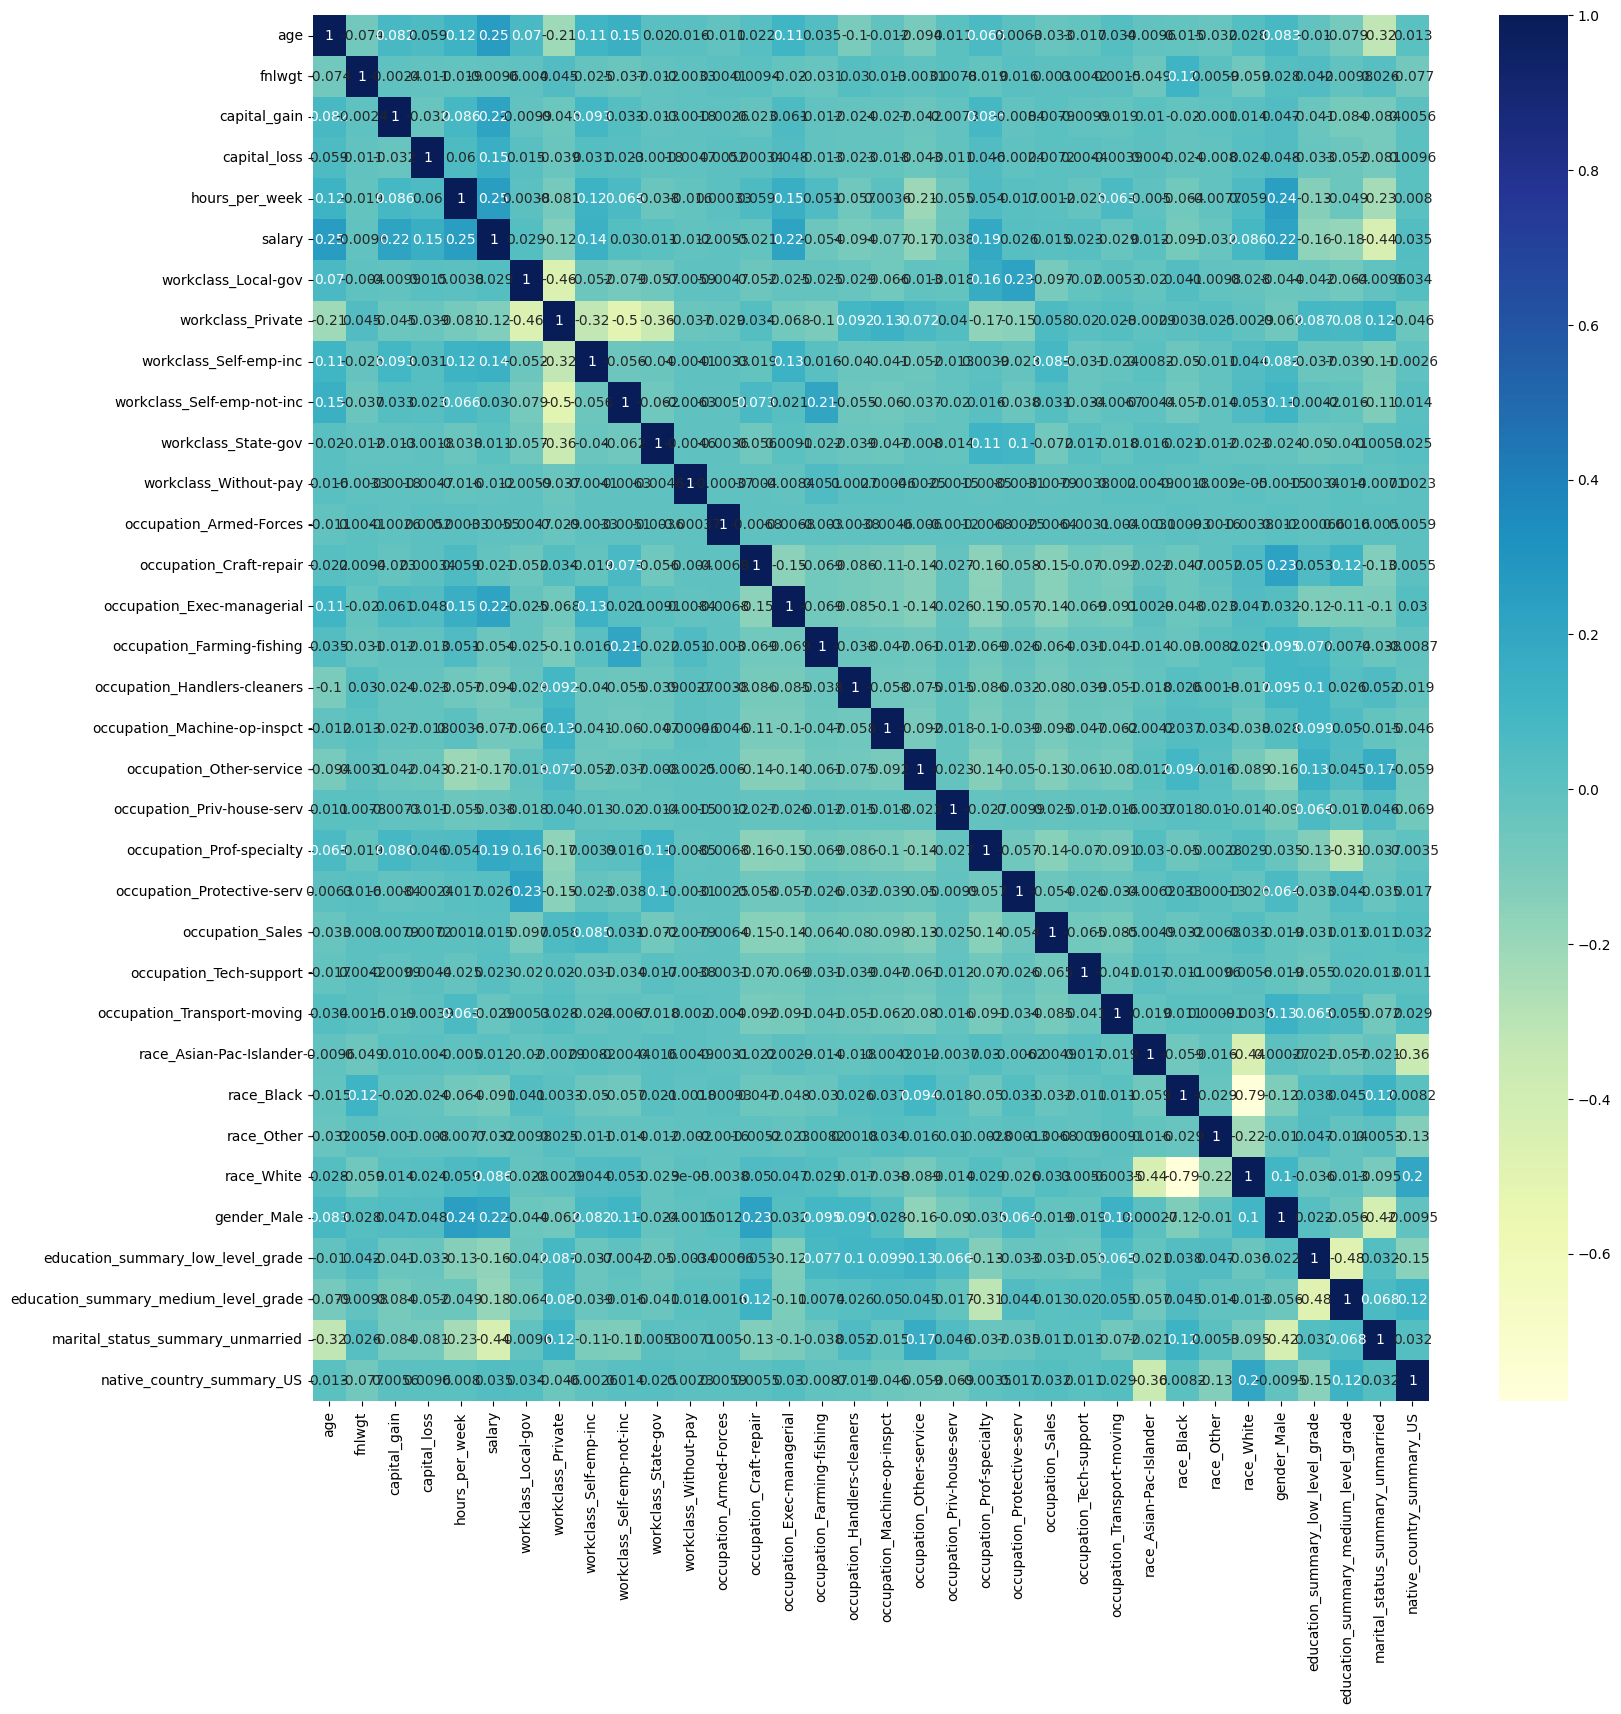

In [540]:
fig,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_corr,annot=True,cmap="YlGnBu");

In [541]:
df_corr_salary = df_corr[["salary"]].sort_values("salary",ascending=False)[1::]
df_corr_salary

salary
age                                   0.253154
hours_per_week                        0.247289
capital_gain                          0.221861
gender_Male                           0.215958
occupation_Exec-managerial            0.215052
occupation_Prof-specialty             0.185041
capital_loss                          0.152473
workclass_Self-emp-inc                0.138401
race_White                            0.085940
native_country_summary_US             0.035236
workclass_Self-emp-not-inc            0.030163
workclass_Local-gov                   0.028811
occupation_Protective-serv            0.026057
occupation_Tech-support               0.023145
occupation_Sales                      0.014767
race_Asian-Pac-Islander               0.011656
workclass_State-gov                   0.010664
occupation_Armed-Forces              -0.005511
fnlwgt                               -0.009560
workclass_Without-pay                -0.012432
occupation_Craft-repair              -0.021108
occupation_Transport-moving          -0.029407
race_Other                           -0.032194
occupation_Priv-house-serv           -0.037826
occupation_Farming-fishing           -0.054263
occupation_Machine-op-inspct         -0.076733
race_Black                           -0.090562
occupation_Handlers-cleaners         -0.094300
workclass_Private                    -0.121050
education_summary_low_level_grade    -0.162471
occupation_Other-service             -0.166025
education_summary_medium_level_grade -0.182966
marital_status_summary_unmarried     -0.437555

In [542]:
df_corr_salary.values

array([[ 0.2531536 ],
       [ 0.24728937],
       [ 0.22186098],
       [ 0.21595782],
       [ 0.21505169],
       [ 0.18504101],
       [ 0.15247256],
       [ 0.13840089],
       [ 0.08594031],
       [ 0.0352359 ],
       [ 0.0301627 ],
       [ 0.02881066],
       [ 0.02605685],
       [ 0.02314497],
       [ 0.0147671 ],
       [ 0.01165586],
       [ 0.01066368],
       [-0.00551142],
       [-0.00956001],
       [-0.01243221],
       [-0.02110825],
       [-0.02940659],
       [-0.03219413],
       [-0.03782621],
       [-0.05426259],
       [-0.07673273],
       [-0.09056247],
       [-0.09429972],
       [-0.12105005],
       [-0.16247111],
       [-0.1660249 ],
       [-0.18296563],
       [-0.43755451]])

In [543]:
df_corr_salary.index

Index(['age', 'hours_per_week', 'capital_gain', 'gender_Male',
       'occupation_Exec-managerial', 'occupation_Prof-specialty',
       'capital_loss', 'workclass_Self-emp-inc', 'race_White',
       'native_country_summary_US', 'workclass_Self-emp-not-inc',
       'workclass_Local-gov', 'occupation_Protective-serv',
       'occupation_Tech-support', 'occupation_Sales',
       'race_Asian-Pac-Islander', 'workclass_State-gov',
       'occupation_Armed-Forces', 'fnlwgt', 'workclass_Without-pay',
       'occupation_Craft-repair', 'occupation_Transport-moving', 'race_Other',
       'occupation_Priv-house-serv', 'occupation_Farming-fishing',
       'occupation_Machine-op-inspct', 'race_Black',
       'occupation_Handlers-cleaners', 'workclass_Private',
       'education_summary_low_level_grade', 'occupation_Other-service',
       'education_summary_medium_level_grade',
       'marital_status_summary_unmarried'],
      dtype='object')

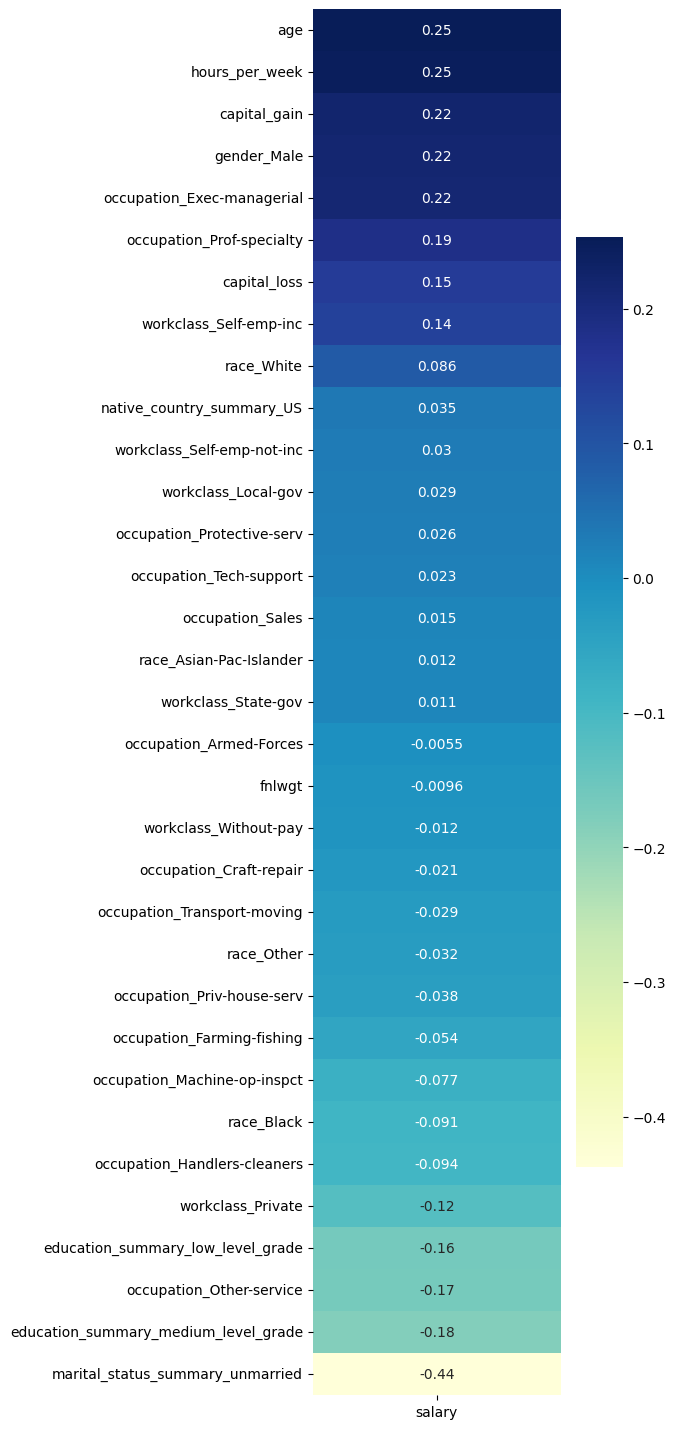

In [544]:
fig,ax=plt.subplots(figsize=(4,18))
sns.heatmap(df_corr_salary,annot=True,cmap="YlGnBu");

In [545]:
df_corr_salary.sort_values('salary', ascending=True , inplace = True)

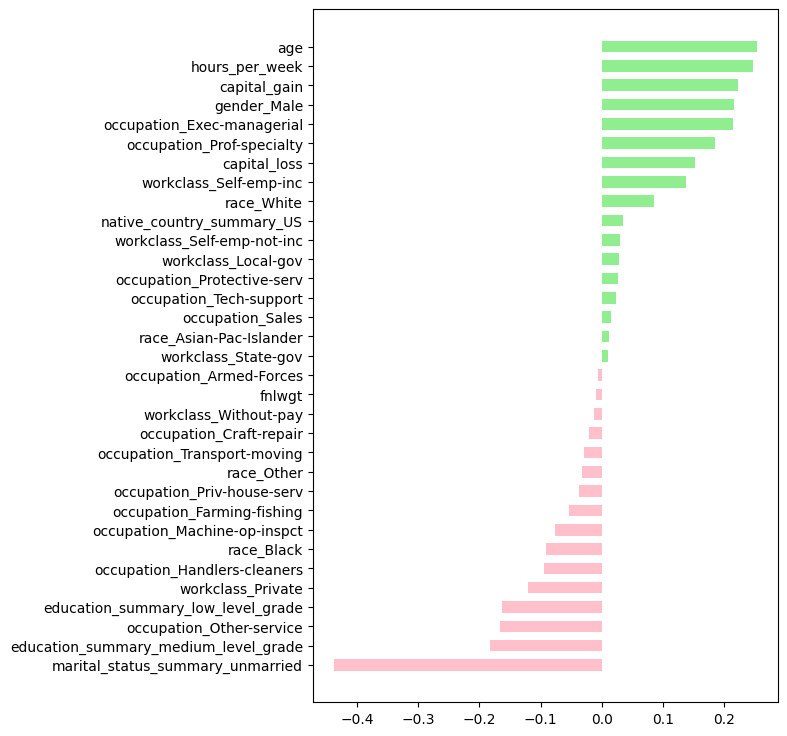

In [546]:
# Your Code is Here
color1 = [('lightgreen' if p > 0 else 'pink') for p in df_corr_salary.salary]
plt.figure(figsize=(6,9))

ax = plt.barh(df_corr_salary.index,df_corr_salary.salary,
              height = 0.6, 
              align='center',
              color=color1)

In [547]:
df_dummied = pd.get_dummies(df,drop_first=True)

In [548]:
df_dummied.shape

(29974, 34)

In [568]:
label_encoder= LabelEncoder()

['workclass',
 'occupation',
 'race',
 'gender',
 'education_summary',
 'marital_status_summary',
 'native_country_summary']

# Logistic Regression

## Data Pre-Processing

In [570]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [583]:
X = df.drop(columns='salary')
y = df.salary

In [584]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25, stratify=y, random_state=101)

In [585]:
list_col = list(df.select_dtypes(include='object').columns)
list_col


['workclass',
 'occupation',
 'race',
 'gender',
 'education_summary',
 'marital_status_summary',
 'native_country_summary']

In [586]:
label_encoder= LabelEncoder()

In [587]:
for i in list_col :
    X_train[i] = label_encoder.fit_transform(X_train[i])
    X_test[i] = label_encoder.transform(X_test[i])

In [588]:
operations = [('scaler',StandardScaler()),('logistic',LogisticRegression())]
log_pipe = Pipeline(steps=operations)      

In [589]:
log_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [591]:
y_pred = log_pipe.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [592]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [593]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 

Test_Set
[[5214  417]
 [ 889  974]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5631
           1       0.70      0.52      0.60      1863

    accuracy                           0.83      7494
   macro avg       0.78      0.72      0.74      7494
weighted avg       0.82      0.83      0.82      7494


Train_Set
[[15692  1201]
 [ 2640  2947]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     16893
           1       0.71      0.53      0.61      5587

    accuracy                           0.83     22480
   macro avg       0.78      0.73      0.75     22480
weighted avg       0.82      0.83      0.82     22480



## GridSearch CV

In [595]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [596]:
operations = [('scaler',StandardScaler()),('logistic',LogisticRegression())]

In [597]:
log_pipe = Pipeline(steps=operations)

In [598]:
penalty = ['l1','l2']
C = [0.01,0.1,1]
class_weight = ['balanced',None]

In [599]:
solver = ['lbfgs','liblinear'] #'sag', 'saga'

In [600]:
param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}

In [601]:
cv = StratifiedKFold(n_splits=10)

In [602]:
grid_model = GridSearchCV(estimator=log_pipe,
                          param_grid=param_grid,
                          cv=cv,
                          scoring='recall',
                          n_jobs= -1,
                          return_train_score=True)

In [604]:
log_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [605]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='recall')

In [606]:
grid_model.best_params_

{'logistic__C': 0.01,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [607]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [608]:
grid_model.best_score_

0.8324712588403511

In [609]:
grid_model.best_index_

1

In [610]:
pd.DataFrame(grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.832471
mean_train_score    0.832747
Name: 1, dtype: object

In [611]:
eval_metric(grid_model, X_train, y_train, X_test, y_test) 

Test_Set
[[4234 1397]
 [ 349 1514]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      5631
           1       0.52      0.81      0.63      1863

    accuracy                           0.77      7494
   macro avg       0.72      0.78      0.73      7494
weighted avg       0.82      0.77      0.78      7494


Train_Set
[[12576  4317]
 [  941  4646]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.83     16893
           1       0.52      0.83      0.64      5587

    accuracy                           0.77     22480
   macro avg       0.72      0.79      0.73     22480
weighted avg       0.83      0.77      0.78     22480



# KNN

In [612]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier())]

In [613]:
knn_pipe = Pipeline(steps=operations)

In [614]:
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [615]:
y_pred = knn_pipe.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [617]:
y_pred_proba = knn_pipe.predict_proba(X_test)

In [619]:
pd.DataFrame(y_pred_proba)

0    1
0     0.0  1.0
1     1.0  0.0
2     1.0  0.0
3     0.4  0.6
4     0.0  1.0
...   ...  ...
7489  1.0  0.0
7490  0.6  0.4
7491  1.0  0.0
7492  0.6  0.4
7493  0.8  0.2

[7494 rows x 2 columns]

In [620]:
eval_metric(knn_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[5077  554]
 [ 798 1065]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5631
           1       0.66      0.57      0.61      1863

    accuracy                           0.82      7494
   macro avg       0.76      0.74      0.75      7494
weighted avg       0.81      0.82      0.82      7494


Train_Set
[[15846  1047]
 [ 1716  3871]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     16893
           1       0.79      0.69      0.74      5587

    accuracy                           0.88     22480
   macro avg       0.84      0.82      0.83     22480
weighted avg       0.87      0.88      0.87     22480



## Elbow Method for Choosing Reasonable K Values

In [621]:
test_error_rates = []

In [622]:
for k in range(1,10):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['recall'], cv = 5)
    
    recall_mean = scores["test_recall"].mean() 
    
    test_error = 1 - recall_mean
    
    test_error_rates.append(test_error)

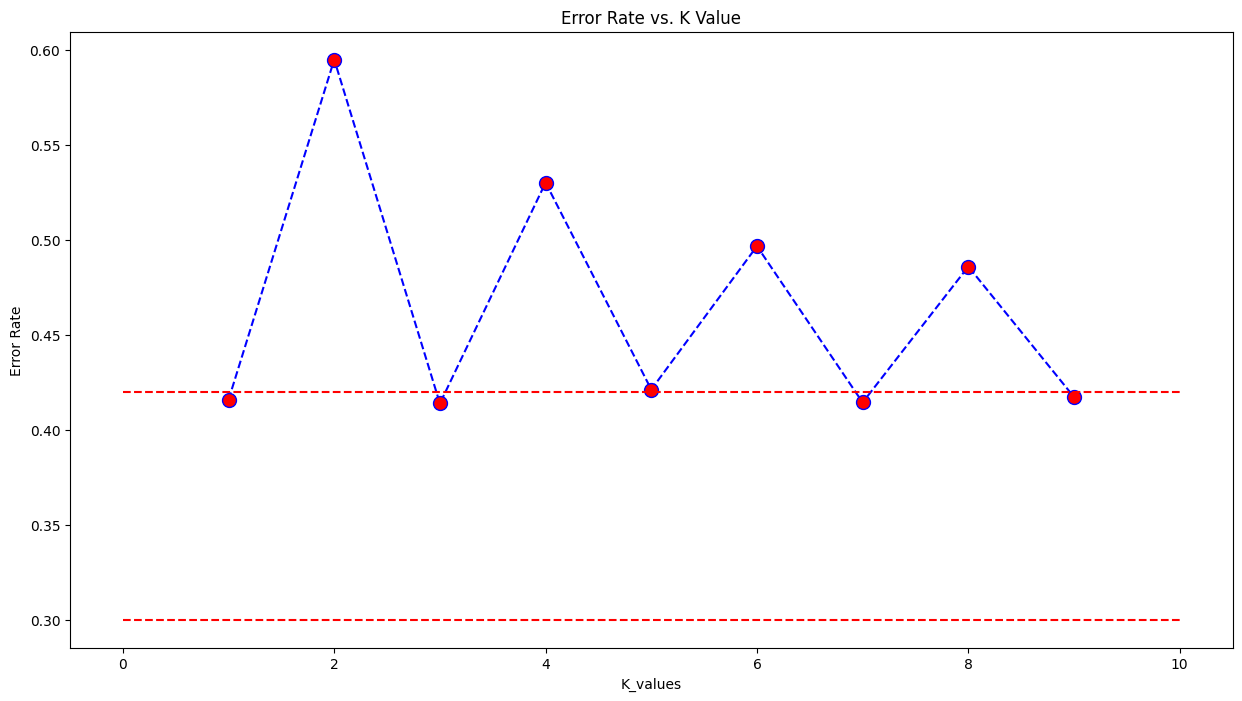

In [625]:
plt.figure(figsize=(15,8))
plt.plot(range(1,10), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.42, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.3, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

## Overfiting and underfiting control for k values

In [628]:
test_error_rates = []
train_error_rates = []

In [629]:
for k in range(1,10):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['recall'], cv = 5, return_train_score=True)
    
    recall_test_mean = scores["test_recall"].mean() 
    recall_train_mean = scores["train_recall"].mean() 

    
    test_error = 1 - recall_test_mean
    train_error = 1 - recall_train_mean
    test_error_rates.append(test_error)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,10), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,10), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.39, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.286, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

In [630]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=3))]
knn3 = Pipeline(steps=operations)

knn3.fit(X_train, y_train)
print('WITH K=3\n')
eval_metric(knn3, X_train, y_train, X_test, y_test)

WITH K=3

Test_Set
[[5019  612]
 [ 799 1064]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      5631
           1       0.63      0.57      0.60      1863

    accuracy                           0.81      7494
   macro avg       0.75      0.73      0.74      7494
weighted avg       0.81      0.81      0.81      7494


Train_Set
[[15990   903]
 [ 1397  4190]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     16893
           1       0.82      0.75      0.78      5587

    accuracy                           0.90     22480
   macro avg       0.87      0.85      0.86     22480
weighted avg       0.90      0.90      0.90     22480



In [632]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
knn5 = Pipeline(steps=operations)

knn5.fit(X_train, y_train)
print('WITH K=5\n')
eval_metric(knn5, X_train, y_train, X_test, y_test)

WITH K=5

Test_Set
[[5077  554]
 [ 798 1065]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5631
           1       0.66      0.57      0.61      1863

    accuracy                           0.82      7494
   macro avg       0.76      0.74      0.75      7494
weighted avg       0.81      0.82      0.82      7494


Train_Set
[[15846  1047]
 [ 1716  3871]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     16893
           1       0.79      0.69      0.74      5587

    accuracy                           0.88     22480
   macro avg       0.84      0.82      0.83     22480
weighted avg       0.87      0.88      0.87     22480



In [633]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))]
knn7 = Pipeline(steps=operations)

knn7.fit(X_train, y_train)
print('WITH K=7\n')
eval_metric(knn7, X_train, y_train, X_test, y_test)

WITH K=7

Test_Set
[[5103  528]
 [ 819 1044]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      5631
           1       0.66      0.56      0.61      1863

    accuracy                           0.82      7494
   macro avg       0.76      0.73      0.75      7494
weighted avg       0.81      0.82      0.81      7494


Train_Set
[[15780  1113]
 [ 1881  3706]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     16893
           1       0.77      0.66      0.71      5587

    accuracy                           0.87     22480
   macro avg       0.83      0.80      0.81     22480
weighted avg       0.86      0.87      0.86     22480



## Cross Validate For Optimal K Value

In [634]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1   0.049307    0.474021       0.837633        0.866153        0.697342   
2   0.044489    0.458367       0.818505        0.868179        0.651210   
3   0.044516    0.459252       0.837189        0.865016        0.699170   
4   0.060874    0.645609       0.831851        0.865658        0.694624   
5   0.059459    0.629087       0.824733        0.865411        0.665331   
6   0.058458    0.628070       0.829626        0.866647        0.681818   
7   0.059400    0.638092       0.832740        0.866449        0.701099   
8   0.059839    0.633059       0.828292        0.869019        0.681342   
9   0.058473    0.648985       0.825623        0.867240        0.673597   
10  0.058843    0.625093       0.839858        0.864620        0.710359   

    train_precision  test_recall  train_recall   test_f1  train_f1  
1          0.766109     0.611111      0.664347  0.651385  0.711608  
2          0.772120     0.578853      0.666335  0.612903  0.715338  
3          0.764747     0.603943      0.659972  0.648077  0.708507  
4          0.766620     0.577818      0.660501  0.630859  0.709615  
5          0.769339     0.593918      0.654733  0.627599  0.707425  
6          0.767693     0.590340      0.664479  0.632790  0.712367  
7          0.767479     0.570662      0.663683  0.629191  0.711817  
8          0.775359     0.581395      0.665871  0.627413  0.716456  
9          0.772960     0.579606      0.659507  0.623077  0.711741  
10         0.764992     0.601073      0.657120  0.651163  0.706965

## Gridsearch Method for Choosing Reasonable K Values

In [637]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

In [639]:
k_values= range(1,10)

In [641]:
param_grid = {"knn__n_neighbors":k_values, "knn__p": [1,2], "knn__weights": ['uniform', "distance"]}

In [642]:
knn_grid_model = GridSearchCV(knn_model,param_grid,cv=10,scoring='recall',return_train_score=True,n_jobs=-1)

In [643]:
knn_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 10), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='recall')

In [662]:
def grid_best(model):
    print('*'*50)
    print(model.best_params_)
    print('*'*50)
    print(model.best_estimator_)
    print('*'*50)
    print(model.best_index_)
    print('*'*50)


In [663]:
grid_best(knn_grid_model)

**************************************************
{'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}
**************************************************
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3, p=1))])
**************************************************
8
**************************************************


In [644]:
knn_grid_model.best_params_

{'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}

In [664]:
pd.DataFrame(knn_grid_model.cv_results_).loc[32, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.592811
mean_train_score    0.650856
Name: 32, dtype: object

In [689]:
print('WITH K=3\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

WITH K=3

Test_Set
[[5029  602]
 [ 767 1096]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5631
           1       0.65      0.59      0.62      1863

    accuracy                           0.82      7494
   macro avg       0.76      0.74      0.75      7494
weighted avg       0.81      0.82      0.81      7494


Train_Set
[[15992   901]
 [ 1364  4223]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     16893
           1       0.82      0.76      0.79      5587

    accuracy                           0.90     22480
   macro avg       0.87      0.85      0.86     22480
weighted avg       0.90      0.90      0.90     22480



# Implement Decision Tree

In [666]:
dt_model = DecisionTreeClassifier(random_state=101)

In [667]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [668]:
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)

In [669]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[4844  787]
 [ 707 1156]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      5631
           1       0.59      0.62      0.61      1863

    accuracy                           0.80      7494
   macro avg       0.73      0.74      0.74      7494
weighted avg       0.80      0.80      0.80      7494


Train_Set
[[16893     0]
 [    1  5586]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16893
           1       1.00      1.00      1.00      5587

    accuracy                           1.00     22480
   macro avg       1.00      1.00      1.00     22480
weighted avg       1.00      1.00      1.00     22480



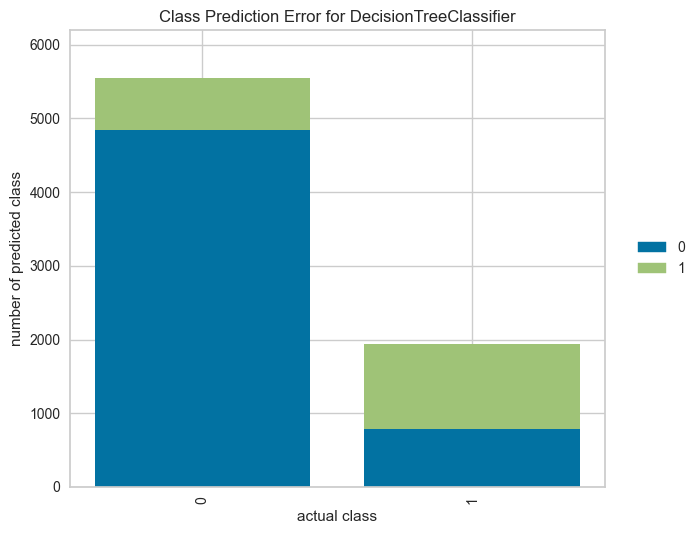

In [670]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dt_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [671]:
scores = cross_validate(dt_model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)

In [672]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision_micro  \
1   0.076308    0.006981       0.806050        1.000000              0.806050   
2   0.076118    0.006981       0.806940        0.999951              0.806940   
3   0.071813    0.005980       0.802936        0.999951              0.802936   
4   0.068814    0.005985       0.812278        0.999951              0.812278   
5   0.070417    0.005980       0.806050        0.999951              0.806050   
6   0.071363    0.005986       0.810053        0.999951              0.810053   
7   0.071364    0.005985       0.822954        0.999951              0.822954   
8   0.068423    0.005981       0.804270        1.000000              0.804270   
9   0.070413    0.006976       0.814947        0.999951              0.814947   
10  0.067416    0.005986       0.822064        0.999951              0.822064   

    train_precision_micro  test_recall_micro  train_recall_micro  \
1                1.000000           0.806050            1.000000   
2                0.999951           0.806940            0.999951   
3                0.999951           0.802936            0.999951   
4                0.999951           0.812278            0.999951   
5                0.999951           0.806050            0.999951   
6                0.999951           0.810053            0.999951   
7                0.999951           0.822954            0.999951   
8                1.000000           0.804270            1.000000   
9                0.999951           0.814947            0.999951   
10               0.999951           0.822064            0.999951   

    test_f1_micro  train_f1_micro  
1        0.806050        1.000000  
2        0.806940        0.999951  
3        0.802936        0.999951  
4        0.812278        0.999951  
5        0.806050        0.999951  
6        0.810053        0.999951  
7        0.822954        0.999951  
8        0.804270        1.000000  
9        0.814947        0.999951  
10       0.822064        0.999951

In [673]:
df_scores.mean()[2:]

test_accuracy            0.810854
train_accuracy           0.999960
test_precision_micro     0.810854
train_precision_micro    0.999960
test_recall_micro        0.810854
train_recall_micro       0.999960
test_f1_micro            0.810854
train_f1_micro           0.999960
dtype: float64

In [674]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(eval_metric(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, fontsize=10);

In [675]:
pruned_tree = DecisionTreeClassifier(max_depth = 3, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=101)



Test_Set
[[5320  311]
 [ 929  934]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      5631
           1       0.75      0.50      0.60      1863

    accuracy                           0.83      7494
   macro avg       0.80      0.72      0.75      7494
weighted avg       0.83      0.83      0.82      7494


Train_Set
[[15995   898]
 [ 2665  2922]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16893
           1       0.76      0.52      0.62      5587

    accuracy                           0.84     22480
   macro avg       0.81      0.73      0.76     22480
weighted avg       0.83      0.84      0.83     22480

None




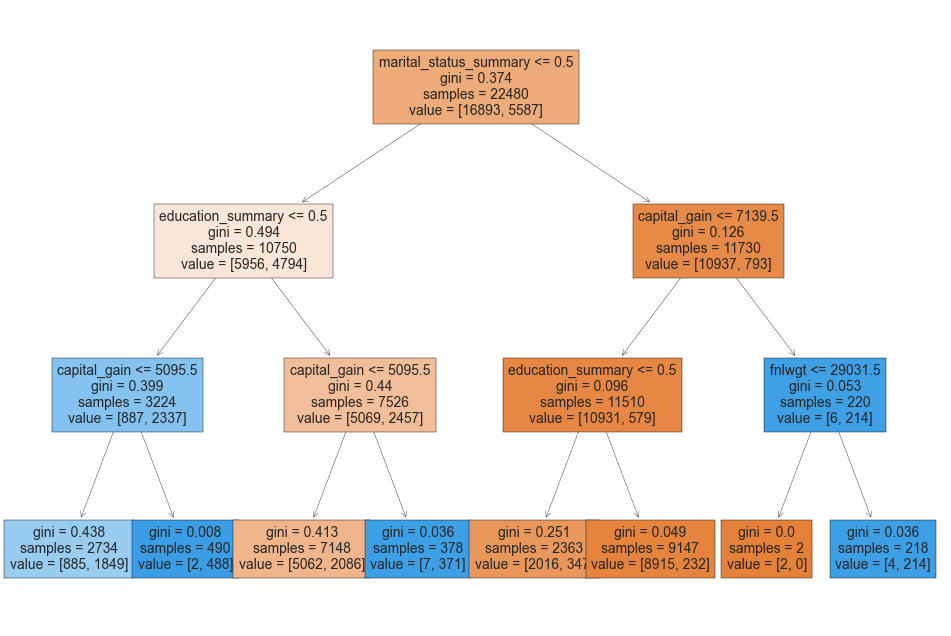

In [676]:
from sklearn.tree import plot_tree

report_model(pruned_tree)
plt.show()

## GridSearchCV

In [677]:
dt_model = DecisionTreeClassifier()

In [678]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [679]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto"],
              "max_depth": [None, 2, 3],
              "min_samples_leaf": [3,4,5],
              "min_samples_split": [3,5,6],
              'class_weight': [None, "balanced"]}

In [680]:
grid_model = GridSearchCV(estimator=dt_model,
                          param_grid=param_grid,
                          scoring='recall',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [681]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 2, 3],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [3, 5, 6],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='recall')

In [682]:
grid_best(grid_model)

**************************************************
{'class_weight': 'balanced', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}
**************************************************
DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=3,
                       min_samples_split=3)
**************************************************
144
**************************************************


In [685]:
model_dt = DecisionTreeClassifier(class_weight='balanced',max_depth = 2 , min_samples_leaf=3,min_samples_split=3,splitter='best')

In [686]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=3,
                       min_samples_split=3)

In [687]:
y_pred = model_dt.predict(X_test)
y_train_pred = model_dt.predict(X_train)



Test_Set
[[3632 1999]
 [ 189 1674]]
              precision    recall  f1-score   support

           0       0.95      0.65      0.77      5631
           1       0.46      0.90      0.60      1863

    accuracy                           0.71      7494
   macro avg       0.70      0.77      0.69      7494
weighted avg       0.83      0.71      0.73      7494


Train_Set
[[10877  6016]
 [  557  5030]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77     16893
           1       0.46      0.90      0.60      5587

    accuracy                           0.71     22480
   macro avg       0.70      0.77      0.69     22480
weighted avg       0.83      0.71      0.73     22480

None




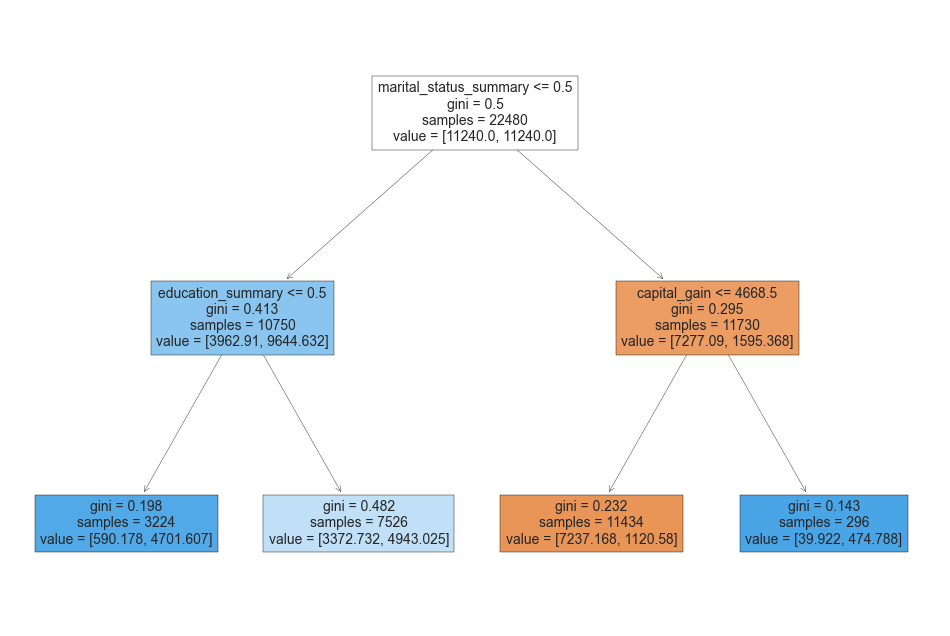

In [688]:
report_model(model_dt)
plt.show()

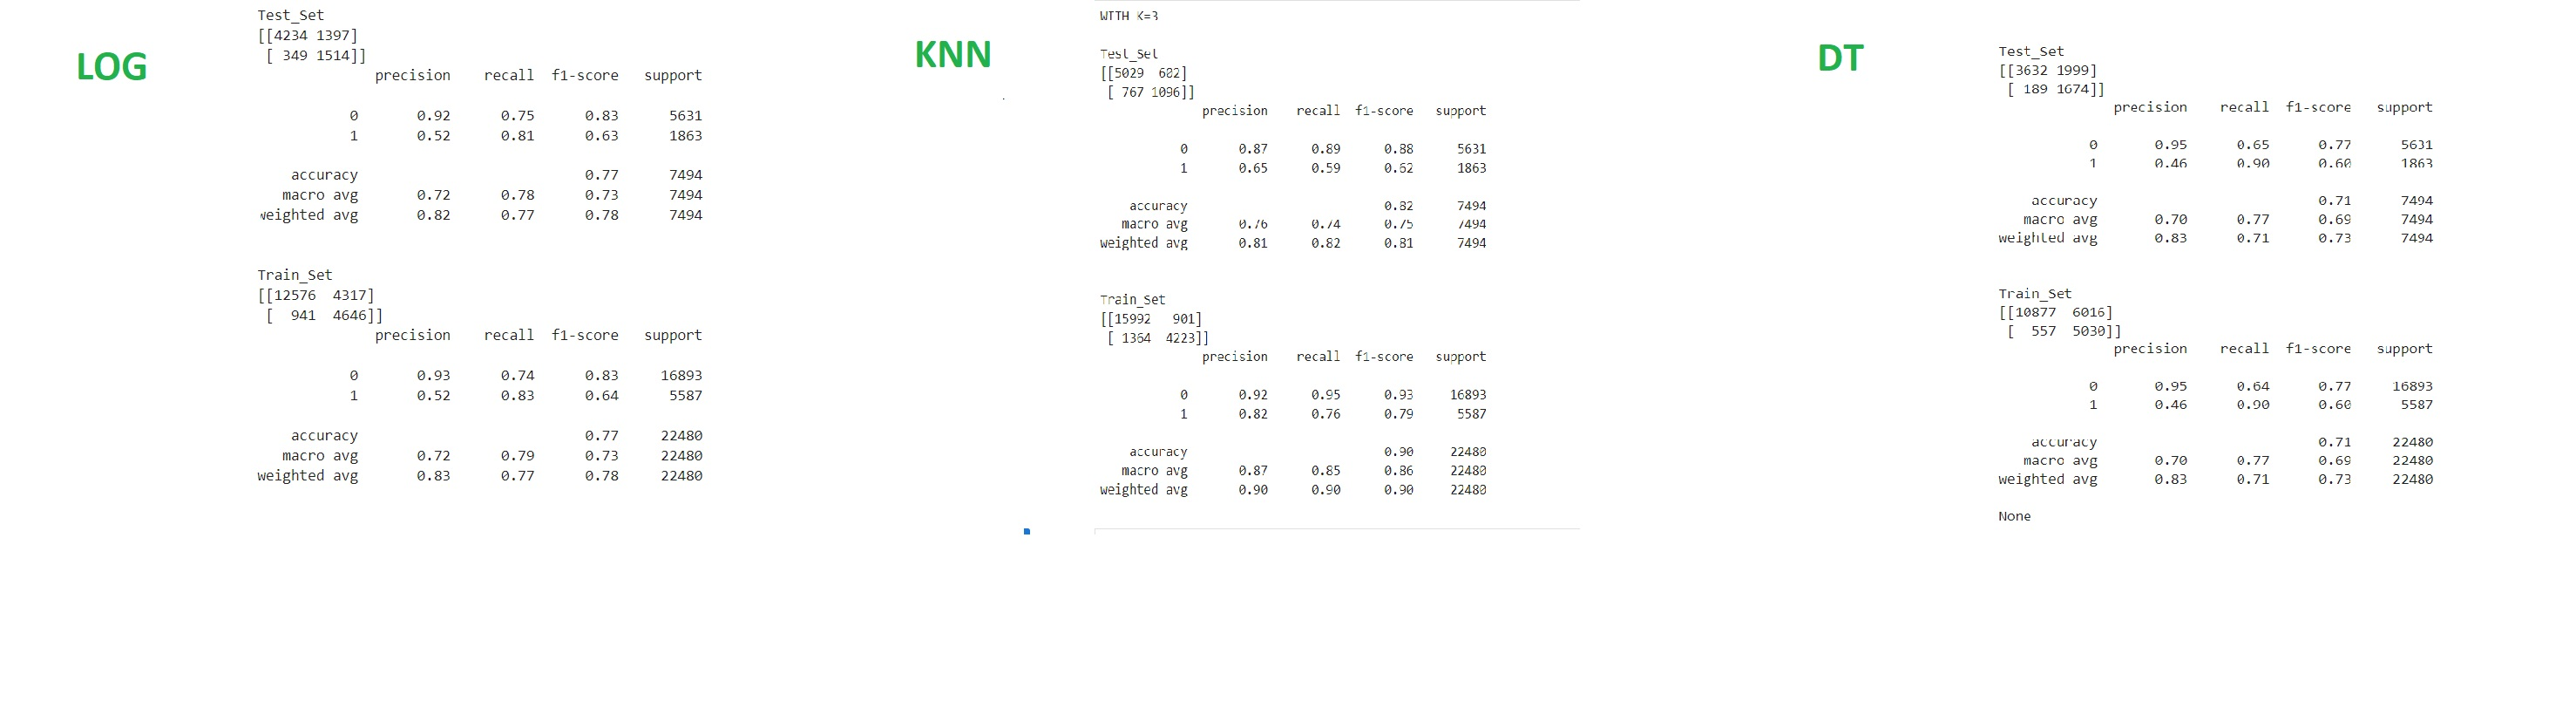

# FINAL MODEL


In [690]:
X = df.drop(columns='salary')
y = df.salary

In [691]:
list_col = list(df.select_dtypes(include='object').columns)
list_col
label_encoder= LabelEncoder()


In [694]:
for i in list_col :
    X[i] = label_encoder.fit_transform(X[i])

In [695]:
y = label_encoder.fit_transform(y)

In [696]:
operations = [('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors=3,p=1))]

In [697]:
final_model = Pipeline(steps=operations)

In [698]:
final_model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3, p=1))])

In [700]:
import pickle

In [701]:
pickle.dump(final_model,open('knn_final_model','wb'))

In [702]:
loaded_model= pickle.load(open('knn_final_model','rb'))

In [703]:
X.describe().T

count           mean            std      min  \
age                     29974.0      38.245012      12.852739     17.0   
workclass               29974.0       2.189831       0.947595      0.0   
fnlwgt                  29974.0  190165.153366  105517.856714  13769.0   
occupation              29974.0       5.948188       4.030398      0.0   
race                    29974.0       3.669280       0.844508      0.0   
gender                  29974.0       0.675152       0.468326      0.0   
capital_gain            29974.0    1092.313071    7422.481543      0.0   
capital_loss            29974.0      88.361347     403.459482      0.0   
hours_per_week          29974.0      40.468973      10.444865      7.0   
education_summary       29974.0       1.368653       0.860550      0.0   
marital_status_summary  29974.0       0.521919       0.499528      0.0   
native_country_summary  29974.0       0.895776       0.305556      0.0   

                             25%       50%       75%        max  
age                         28.0      37.0      47.0       80.0  
workclass                    2.0       2.0       2.0        6.0  
fnlwgt                  118001.0  178813.0  237379.0  1484705.0  
occupation                   2.0       6.0       9.0       13.0  
race                         4.0       4.0       4.0        4.0  
gender                       0.0       1.0       1.0        1.0  
capital_gain                 0.0       0.0       0.0    99999.0  
capital_loss                 0.0       0.0       0.0     3900.0  
hours_per_week              40.0      40.0      45.0       70.0  
education_summary            0.0       2.0       2.0        2.0  
marital_status_summary       0.0       1.0       1.0        1.0  
native_country_summary       1.0       1.0       1.0        1.0

In [706]:
new_obs = {'age':[34,65], 'workclass':[1,4], 'fnlwgt':[45000,500000], 'occupation':[3,7], 'race':[2,3], 'gender':[1,0],
       'capital_gain':[4321,6521], 'capital_loss':[1000,2200], 'hours_per_week':[34,65], 'education_summary':[1,2],
       'marital_status_summary':[0,1], 'native_country_summary':[1,0]}

In [707]:
samples = pd.DataFrame(new_obs)
samples

age  workclass  fnlwgt  occupation  race  gender  capital_gain  \
0   34          1   45000           3     2       1          4321   
1   65          4  500000           7     3       0          6521   

   capital_loss  hours_per_week  education_summary  marital_status_summary  \
0          1000              34                  1                       0   
1          2200              65                  2                       1   

   native_country_summary  
0                       1  
1                       0

In [708]:
predictions = loaded_model.predict(samples)
predictions_proba = loaded_model.predict_proba(samples)

In [709]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

age  workclass  fnlwgt  occupation  race  gender  capital_gain  \
0   34          1   45000           3     2       1          4321   
1   65          4  500000           7     3       0          6521   

   capital_loss  hours_per_week  education_summary  marital_status_summary  \
0          1000              34                  1                       0   
1          2200              65                  2                       1   

   native_country_summary  pred  pred_proba_1  pred_proba_0  
0                       1     0      0.000000      1.000000  
1                       0     0      0.333333      0.666667